<a href="https://colab.research.google.com/github/Kalebe-Nascimento/Data-Mining-for-Video-Game-Sales-Prediction-Using-Decision-Tree-SVM-and-KNN-Algorithms/blob/main/P1_MineracaoDados_Kalebe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## P1 Mineração de Dados

O objetivo deste trabalho é explorar e entender dados, identificando informações valiosas. Para exemplificar a aplicação prática da mineração de dados, analisaremos dados de vendas de videogames.

### Integrante
- Kalebe do Nascimento


### Base de Dados

Base de dados disponível em: free Data Sets & Dataset Samples <
https://mavenanalytics.io/data-playground?accessType=open&order=date_added%2Cdesc >


Abaixo estaremos importando bibliotecas em python para trabalhar com a base de dados, importação, plotagem de gráficos, classificação, treinamento e aprendizado de máquina e decisão.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


### Primeiramente, logo após baixar o arquivo .csv com a base de dados sobre a venda de video game, iremos fazer upload no google drive e em seguir indicar o caminho (path) do arquivo

Depois de indicar o caminho iremos criar uma variável para setar nossa base de dados presente no google drive e assim ver com seu cabeçado com o *.head()*



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vd_sale = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P1-MineracaoDados/Video+Game+Sales/vgchartz-2024.csv')
vd_sale.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


Printando todas a colunas presentes na nossa base de dados para melhor compreensão dos dados

In [ ]:
print(vd_sale.columns)

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')


Com a análise das colunas foi perceptivel que a coluna last_update existe muito arquivos em Nan (vazio), com isso iremos filtrar os dados a partir  da data de "2015-01-01", no modelo Estadunidense.

Mas antes precisamos garatir que os dados dessa coluna (last_update) está no tipo datetime

In [ ]:
vd_sale['last_update'] = pd.to_datetime(vd_sale['last_update'])

In [ ]:
cutoff_date = pd.Timestamp('2015-01-01')

Abaixo irá ser executado duas tarefas, dentre elas a identificação dos dados para serem removidas dos dados antes da data 2015-01-01 e depois dessa checagem irá remover os dados desse dataframe (drop)

In [ ]:
drop_row_index = vd_sale[vd_sale['last_update'] >= cutoff_date].index

In [ ]:
vd_sale = vd_sale.drop(drop_row_index)

Agora iremos remover apenas os anos de lançamento da coluna "release_date" e criar uma nova colunas apenas com o ano e chamar-lá de "year", para melhor análise dos  dados e facilidade cruzamento de dados


In [ ]:
vd_sale['release_date'] = pd.to_datetime(vd_sale['release_date'], errors='coerce')
vd_sale['release_date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

In [ ]:
vd_sale = vd_sale.dropna(subset=['release_date'])

In [ ]:
# Extrair apenas o ano da coluna 'release_date' e criar a nova coluna 'Year'
vd_sale['year'] = vd_sale['release_date'].dt.year.astype(int)

Certificar que a coluna 'release_date' está no formato datetime e depois e depois preencher valores ausentes na coluna 'release_date' com uma data padrão



In [ ]:
vd_sale['release_date'] = pd.to_datetime(vd_sale['release_date'], errors='coerce')

vd_sale['release_date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

Pritando os dados da nova coluna "year"

In [ ]:
print(vd_sale[['release_date', 'year']].head())

  release_date  year
0   2013-09-17  2013
2   2002-10-28  2002
3   2013-09-17  2013
5   2011-11-08  2011
6   2010-11-09  2010


Exibir as primeiras linhas do DataFrame resultante apos a incrementar a coluna 'year'


In [ ]:
print(vd_sale.head())

                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
5  /games/boxart/full_call-of-duty-modern-warfare...   
6  /games/boxart/full_call-of-duty-black-ops_5Ame...   

                            title console    genre       publisher  \
0              Grand Theft Auto V     PS3   Action  Rockstar Games   
2     Grand Theft Auto: Vice City     PS2   Action  Rockstar Games   
3              Grand Theft Auto V    X360   Action  Rockstar Games   
5  Call of Duty: Modern Warfare 3    X360  Shooter      Activision   
6         Call of Duty: Black Ops    X360  Shooter      Activision   

        developer  critic_score  total_sales  na_sales  jp_sales  pal_sales  \
0  Rockstar North           9.4        20.32      6.37      0.99       9.85   
2  Rockstar North           9.6        16.15      8.41      0.47       5.49   
3  Ro

Analisando o volume de dados saber para conhecer a dimensão do dataset sobre venda de video games


In [ ]:
vd_sale.shape

(46137, 15)

In [ ]:
vd_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46137 entries, 0 to 63288
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           46137 non-null  object        
 1   title         46137 non-null  object        
 2   console       46137 non-null  object        
 3   genre         46137 non-null  object        
 4   publisher     46137 non-null  object        
 5   developer     46122 non-null  object        
 6   critic_score  5708 non-null   float64       
 7   total_sales   14903 non-null  float64       
 8   na_sales      10238 non-null  float64       
 9   jp_sales      4788 non-null   float64       
 10  pal_sales     10512 non-null  float64       
 11  other_sales   12166 non-null  float64       
 12  release_date  46137 non-null  datetime64[ns]
 13  last_update   0 non-null      datetime64[ns]
 14  year          46137 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(1

#Nossos campos e tipos de dados são:



*  name - nome do jogo

*   console - Plataforma de lançamento do jogo (ou seja, PC, PS4, etc.), objeto

*   year - Ano de lançamento do jogo, float

* genre - Gênero do jogo, objeto

* publisher - Editora do jogo, objeto

* na_sales – Vendas na América do Norte (em milhões), float

* pal_sales - Vendas na Regioes da Europa e Ocenia (em milhões), float

* jp_sales - Vendas no Japão (em milhões), float

* other_sales - Vendas no resto do mundo (em milhões), float

* total_sales - Total de vendas mundiais, float

A região PAL é um território de publicação de jogos eletrônicos que abrange os países Austrália, Nova Zelândia e Reino Unido, às vezes variando entre países europeus.

In [ ]:
vd_sale.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,year
count,5708.000000,14903.000000,10238.000000,4788.000000,10512.000000,12166.000000,46137,0,46137.000000
mean,7.140960,0.338017,0.261004,0.113415,0.128650,0.038306,2004-06-05 04:25:47.772937088,NaT,2003.945467
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1973-10-08 00:00:00,NaT,1973.000000
25%,6.300000,0.040000,0.050000,0.020000,0.010000,0.000000,1999-12-08 00:00:00,NaT,1999.000000
50%,7.400000,0.130000,0.120000,0.050000,0.030000,0.010000,2006-02-14 00:00:00,NaT,2006.000000
75%,8.200000,0.350000,0.280000,0.130000,0.120000,0.030000,2010-02-03 00:00:00,NaT,2010.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2022-03-04 00:00:00,NaT,2022.000000
std,1.468635,0.722456,0.467656,0.183055,0.313729,0.111339,NaN,NaN,7.461607


Analisando quanto os valores faltantes para cada coluna do dataframe

In [ ]:
vd_sale.isnull().sum()

,0
img,0
title,0
console,0
genre,0
publisher,0
developer,15
critic_score,40429
total_sales,31234
na_sales,35899
jp_sales,41349


Exibindo quantos campos existem de dados para cada tipo de gênero ou seja o número de ocorrências de cada um desses valores

In [ ]:
vd_sale['genre'].value_counts()

,count
genre,
Misc,8796
Action,5999
Sports,4635
Adventure,4396
Shooter,3840
Role-Playing,3534
Platform,2858
Strategy,2777
Puzzle,2701


# Começando a analise e cruzamanto de dados para criar novos dados e informações uteis do sobre nossa base de dados

#Abaixo iremos fazer a analise para mineração de dados e cruzamos eles com intuito de conseguir extrair informações uteis, dentre elas estarão:


*   Quais foram os gêneros de jogos mais feitos
*   Qual ano teve mais jogos lançados
*  Principais jogos lançados nos ultimos 5 anos por gênero
* Qual gênero de jogo mais vendeu em um único ano
* Descobrir qual gênero de jogo tem o maior preço de venda globalmente
* Qual plataforma (console) tem o preço de venda mais alto
* Mapa de calor para comparação de vendas por gênero em cada região
* Comparação de venda de jogos por plataforma
* Ranqueando as top 20 empresas publicadoras de jogos de video game
* Receita arrecada por região com as vendas dos jogos de video game
* Gáfico de pizza da venda da região
* Correlacionando as colunas mapa de calor entre: ano, regiões e avaliação critíca (nota)
* Correlacionando as colunas mapa de pares entre: ano, genero e regiões consumidoras de video games
* Matriz de confusão entre console e genero


##Quais foram os gêneros de jogos mais feitos

Criando um gráfico de barras mostrando a contagem de cada gênero de jogos, ordenados do mais comum ao menos comum.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Misc'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Platform'),
  Text(7, 0, 'Strategy'),
  Text(8, 0, 'Puzzle'),
  Text(9, 0, 'Racing'),
  Text(10, 0, 'Simulation'),
  Text(11, 0, 'Fighting')])

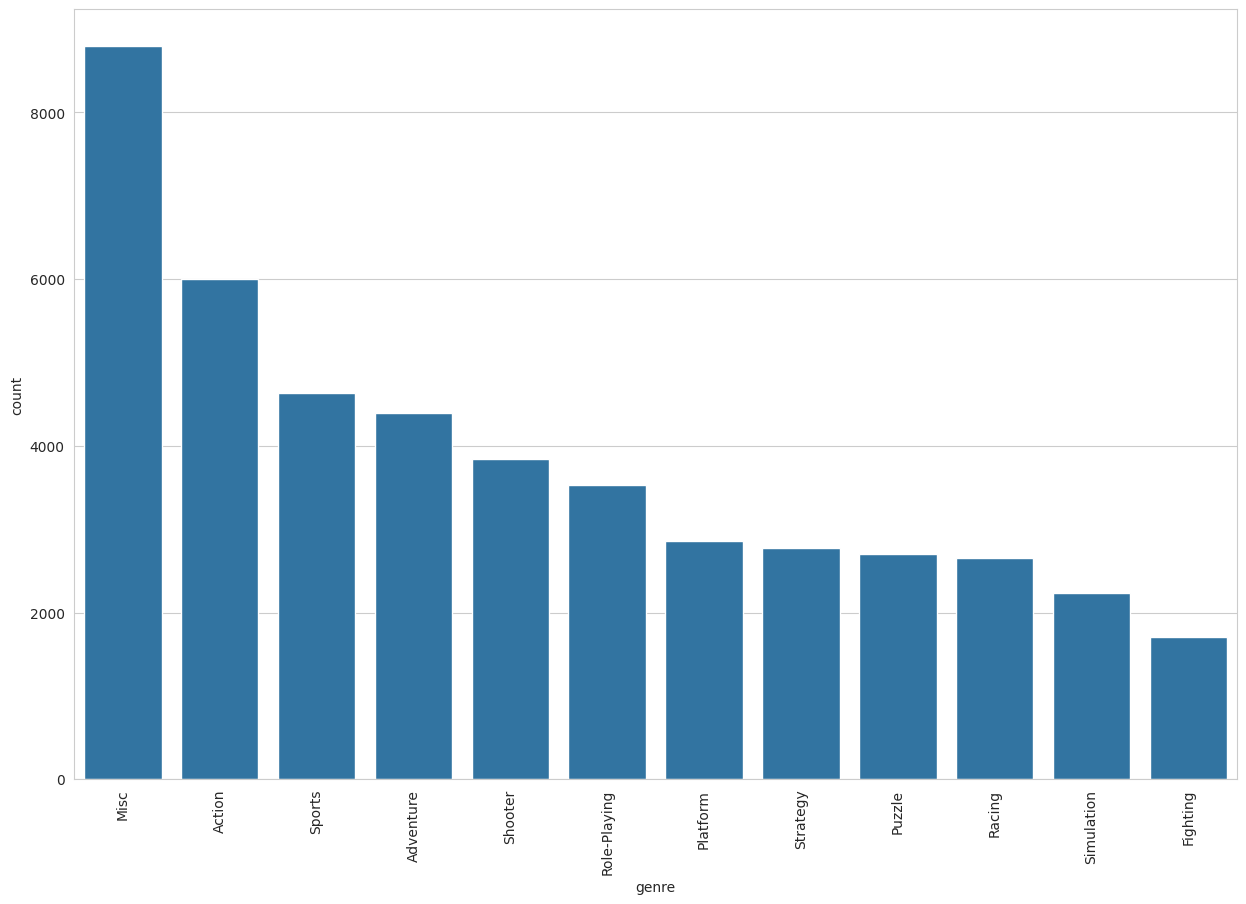

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="genre", data = vd_sale, order = vd_sale['genre'].value_counts().index)
plt.xticks(rotation=90)

##Qual ano teve mais lançamento de jogos

Agrupa o DataFrame vd_sale pela coluna year e conta quantos títulos existem para cada ano (jogos).

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2000'),
  Text(3, 0, '2011'),
  Text(4, 0, '2008'),
  Text(5, 0, '2007'),
  Text(6, 0, '2006'),
  Text(7, 0, '2014'),
  Text(8, 0, '2005'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2001'),
  Text(13, 0, '1999'),
  Text(14, 0, '1996'),
  Text(15, 0, '1994'),
  Text(16, 0, '1995'),
  Text(17, 0, '1998'),
  Text(18, 0, '1993'),
  Text(19, 0, '1997'),
  Text(20, 0, '2013'),
  Text(21, 0, '1992'),
  Text(22, 0, '2012'),
  Text(23, 0, '1991'),
  Text(24, 0, '2015'),
  Text(25, 0, '1990'),
  Text(26, 0, '1989'),
  Text(27, 0, '2016'),
  Text(28, 0, '2020'),
  Text(29, 0, '1988'),
  Text(30, 0, '1987'),
  Text(31, 0, '198

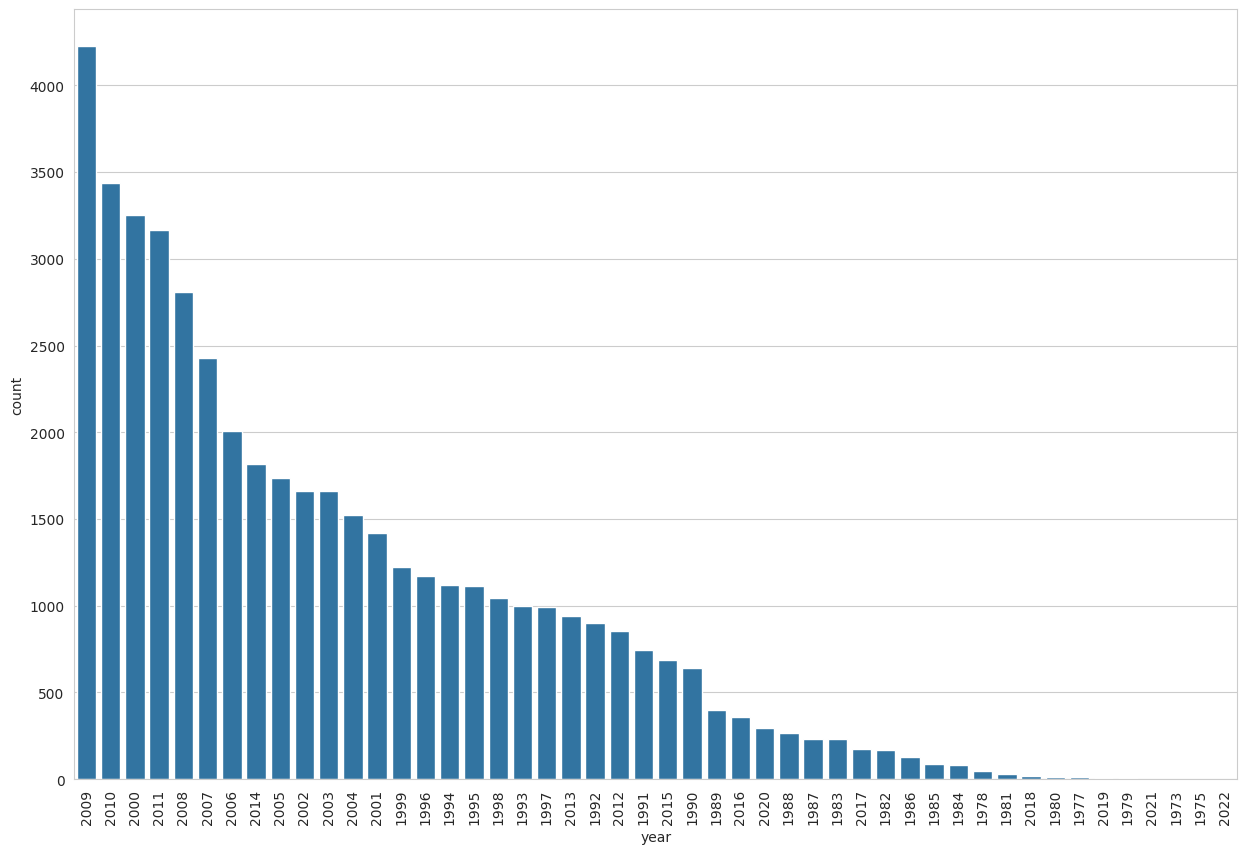

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="year", data=vd_sale, order = vd_sale.groupby(by=['year'])['title'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

##Principais jogos lançados nos últimos 5 anos por gênero

Este código cria um gráfico de barras mostrando a contagem de jogos lançados nos 5 anos, sendo diferenciados por gênero.



([0, 1, 2, 3, 4],
 [Text(0, 0, '2009'),
  Text(1, 0, '2010'),
  Text(2, 0, '2000'),
  Text(3, 0, '2011'),
  Text(4, 0, '2008')])

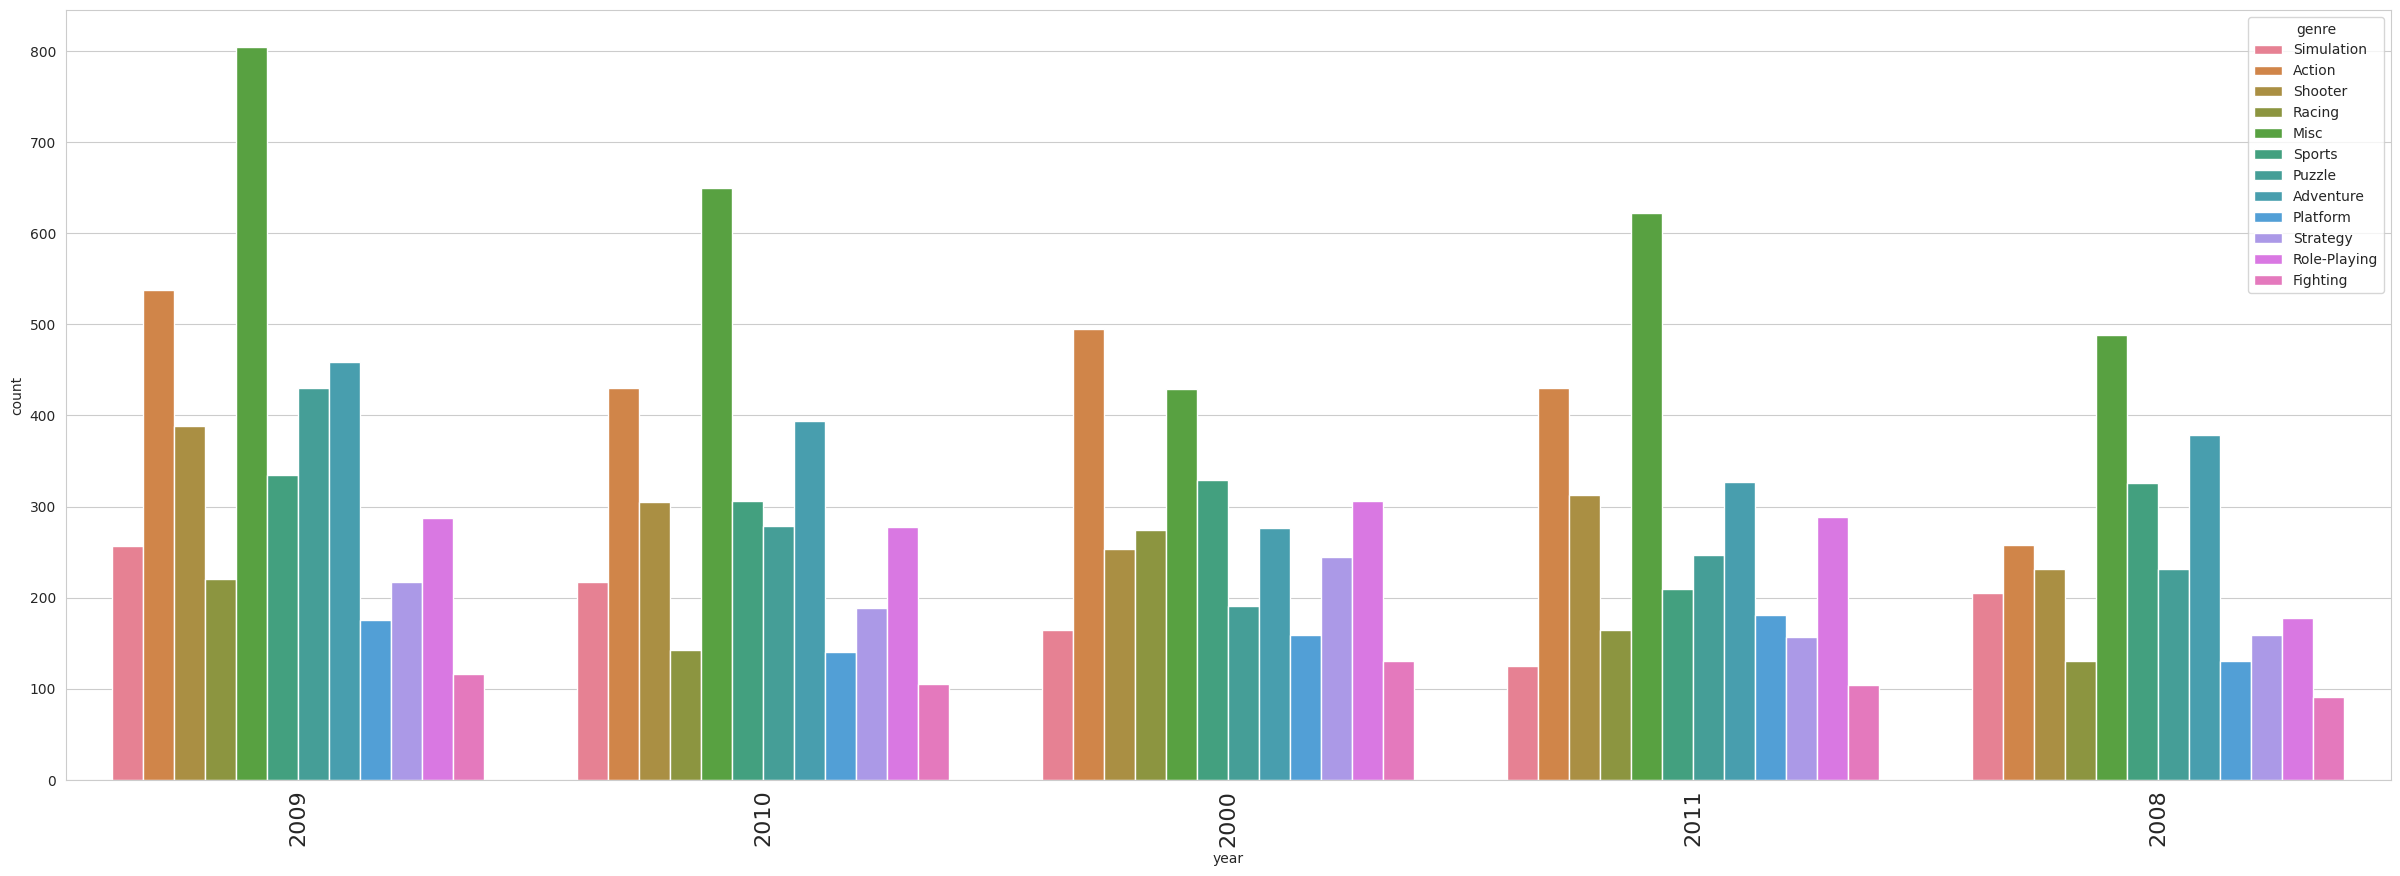

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x="year", data=vd_sale, hue='genre', order=vd_sale.year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

##Descobrindo qual ano teve as maiores numero de vendas em todo o mundo

In [ ]:
data_year = vd_sale.groupby(by=['year'])['total_sales'].sum()
data_year = data_year.reset_index()

### Criando uma nova variável data_year para agrupas os dados year e total vendas para descobrir qual ano teve maiores vendas, então criado um gráfio entre o total de vendas (em milhões) pelo ano

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '1973'),
  Text(1, 0, '1975'),
  Text(2, 0, '1977'),
  Text(3, 0, '1978'),
  Text(4, 0, '1979'),
  Text(5, 0, '1980'),
  Text(6, 0, '1981'),
  Text(7, 0, '1982'),
  Text(8, 0, '1983'),
  Text(9, 0, '1984'),
  Text(10, 0, '1985'),
  Text(11, 0, '1986'),
  Text(12, 0, '1987'),
  Text(13, 0, '1988'),
  Text(14, 0, '1989'),
  Text(15, 0, '1990'),
  Text(16, 0, '1991'),
  Text(17, 0, '1992'),
  Text(18, 0, '1993'),
  Text(19, 0, '1994'),
  Text(20, 0, '1995'),
  Text(21, 0, '1996'),
  Text(22, 0, '1997'),
  Text(23, 0, '1998'),
  Text(24, 0, '1999'),
  Text(25, 0, '2000'),
  Text(26, 0, '2001'),
  Text(27, 0, '2002'),
  Text(28, 0, '2003'),
  Text(29, 0, '2004'),
  Text(30, 0, '2005'),
  Text(31, 0, '200

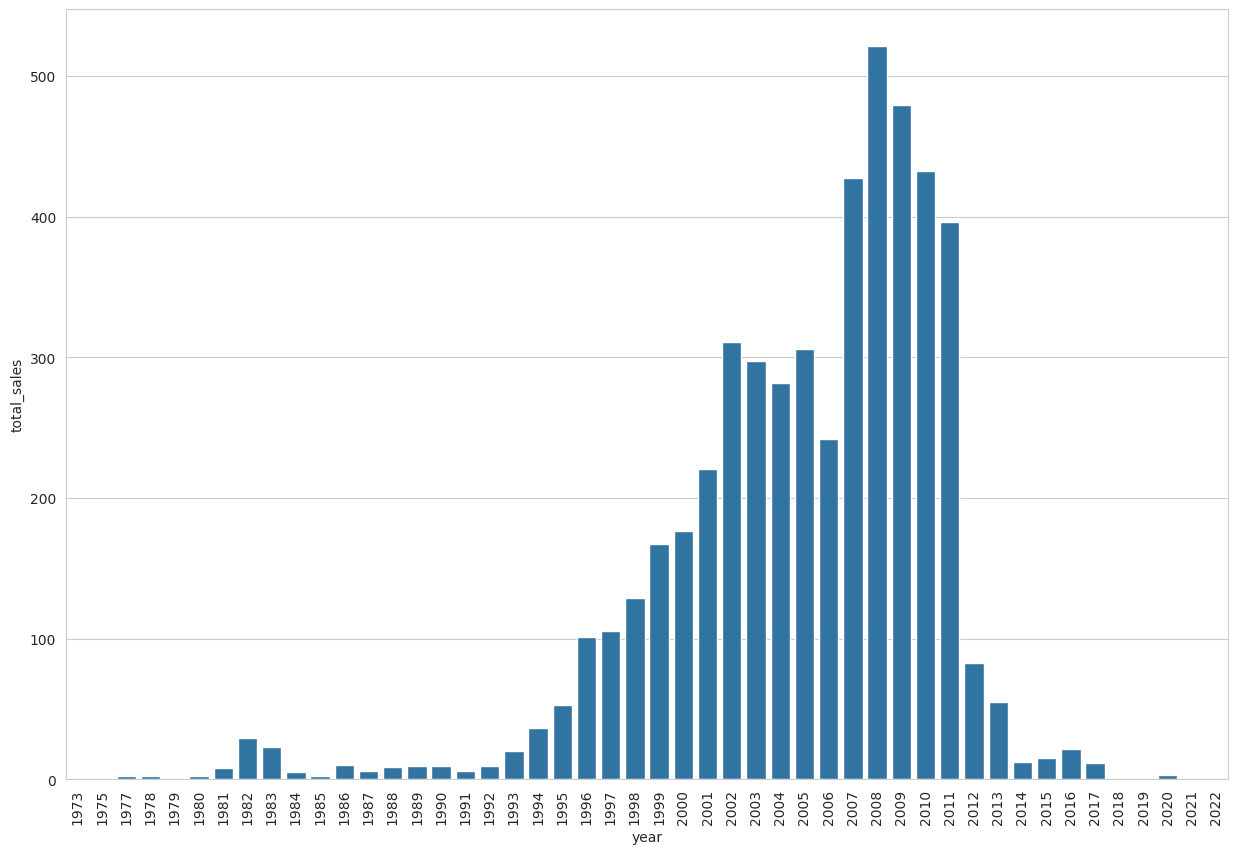

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="year", y="total_sales", data=data_year)
plt.xticks(rotation=90)

#Descobrindo qual gênero de jogo foi mais lançado em um único ano


In [ ]:
year_max_df = vd_sale.groupby(['year', 'genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["year", "count"], keep='last').reset_index(drop=True)

<ipython-input-26-e6386b540331>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['year'])['count'].transform(max) == year_max_df['count']


identifica e visualiza o gênero de jogo mais popular para cada ano no dataset, anotando o gráfico com o nome do gênero e a contagem de jogos. *year_max_df* agrupa os dados por ano e gênero, contando a quantidade de jogos, seleciona esses gêneros e remove duplicadas *year_max_genre*

In [ ]:
genre = year_max_genre['genre'].values

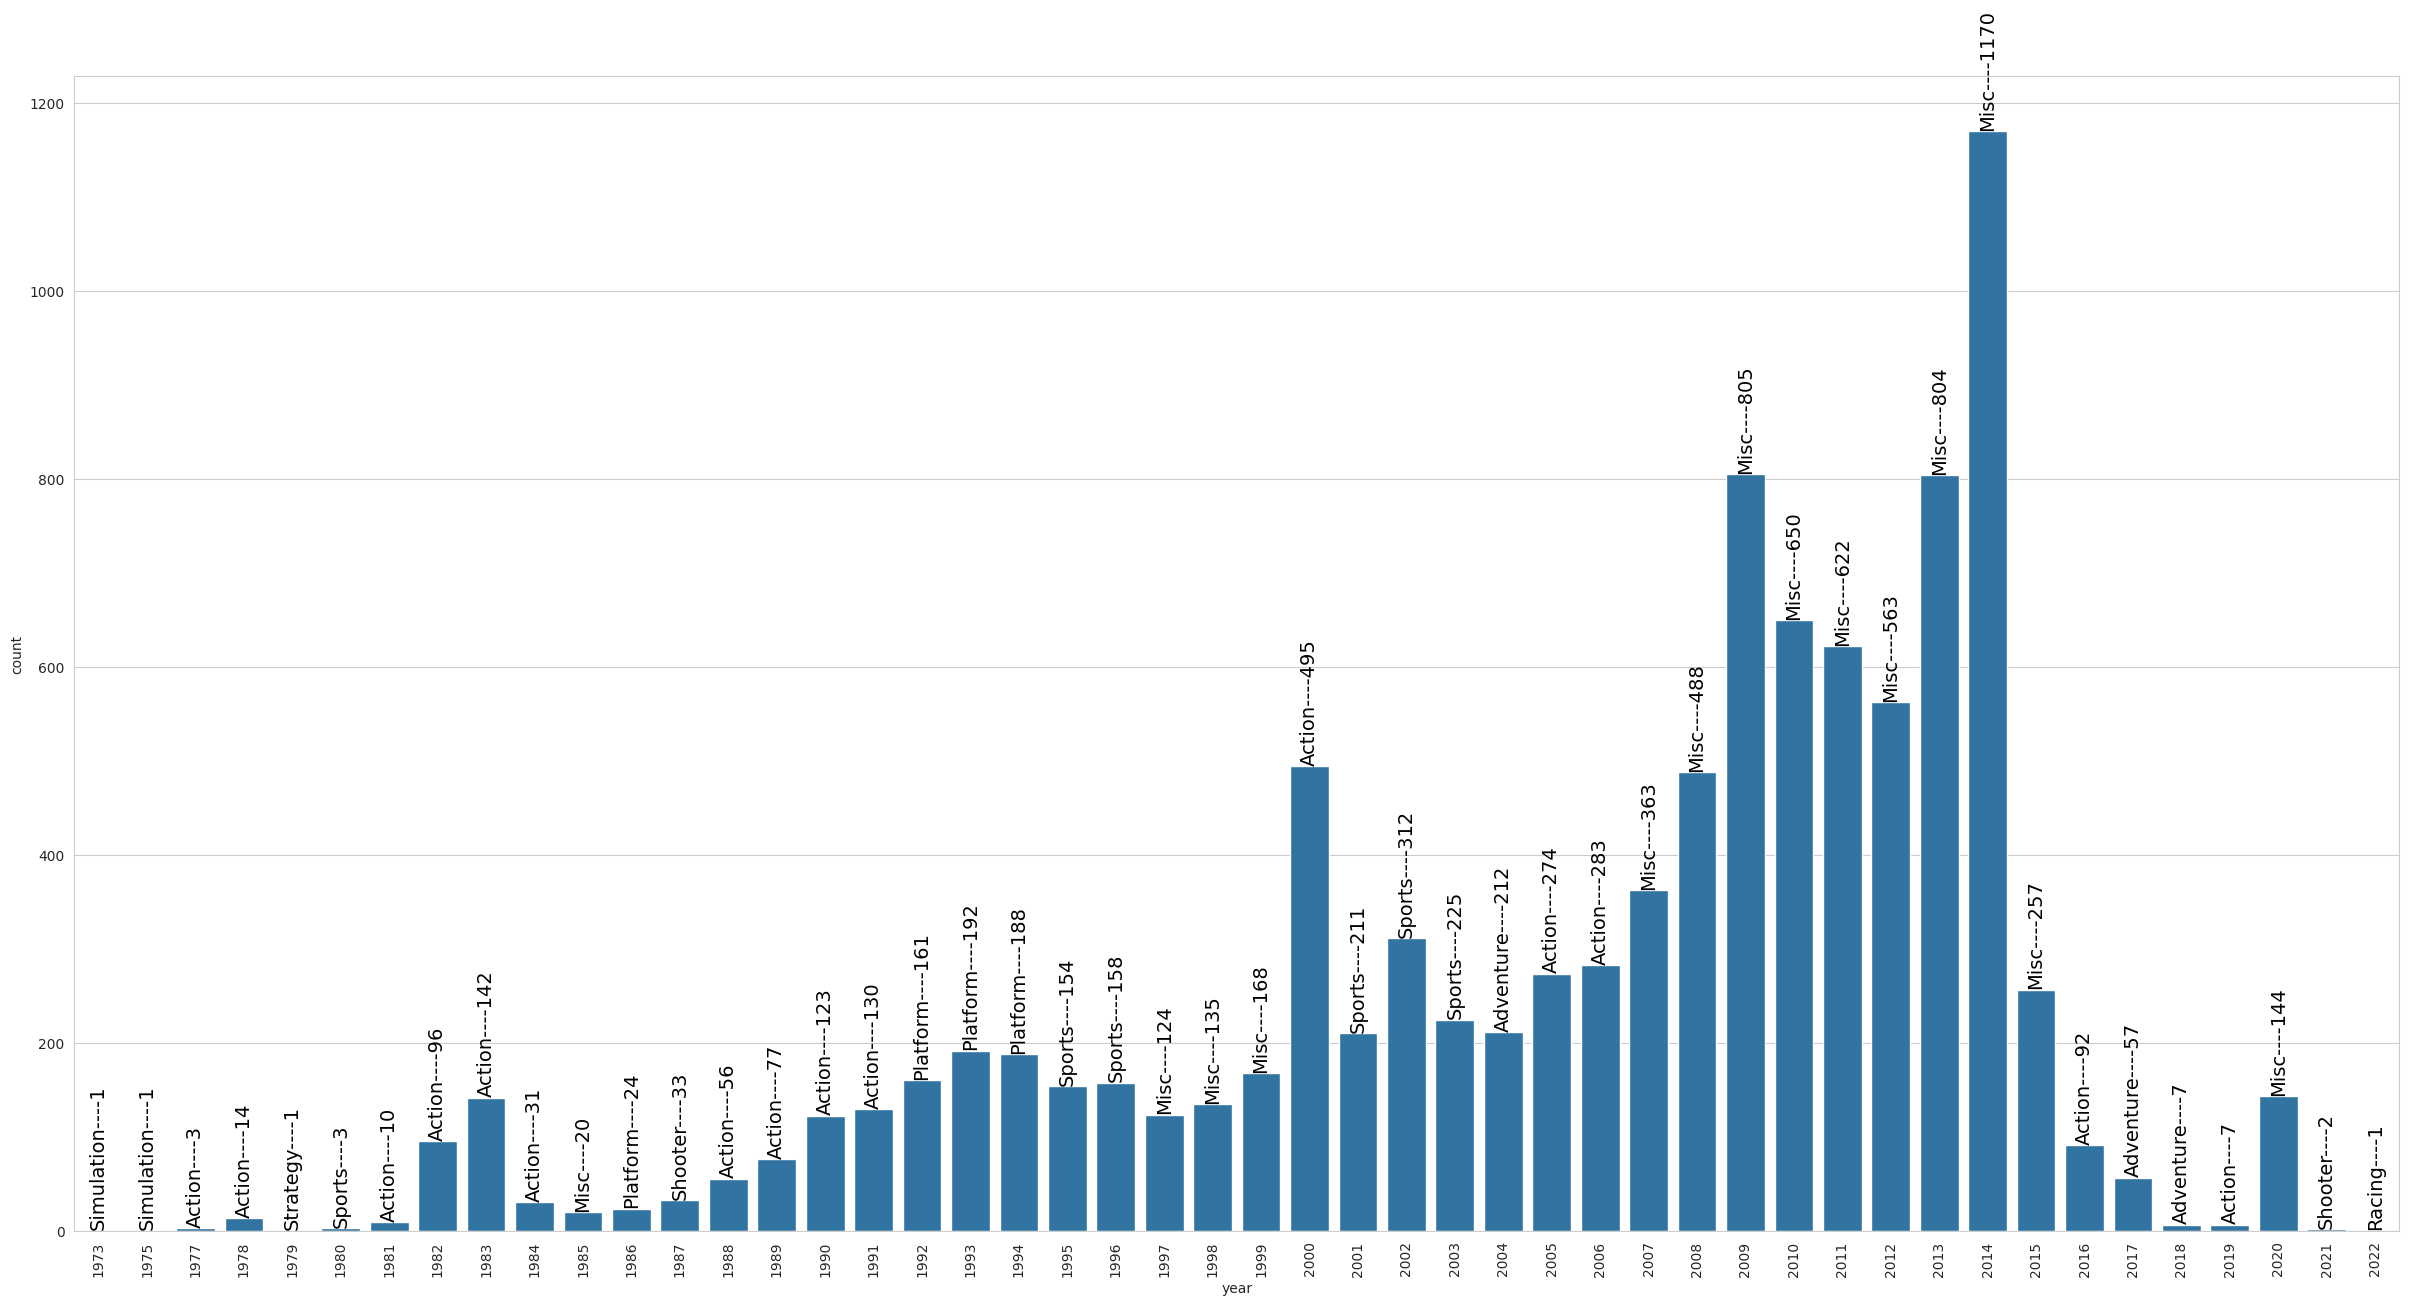

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:

    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)
plt.show()


#Encontrado qual jogo de gênero vendeu mais em um único ano

In [ ]:
year_sale_dx = vd_sale.groupby(by=['year', 'genre'])['total_sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['year'])['total_sales'].transform(max) == year_sale_dx['total_sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

<ipython-input-29-4503140372cc>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_sale = year_sale_dx.groupby(by=['year'])['total_sales'].transform(max) == year_sale_dx['total_sales']


In [ ]:
genre = year_sale_max['genre']

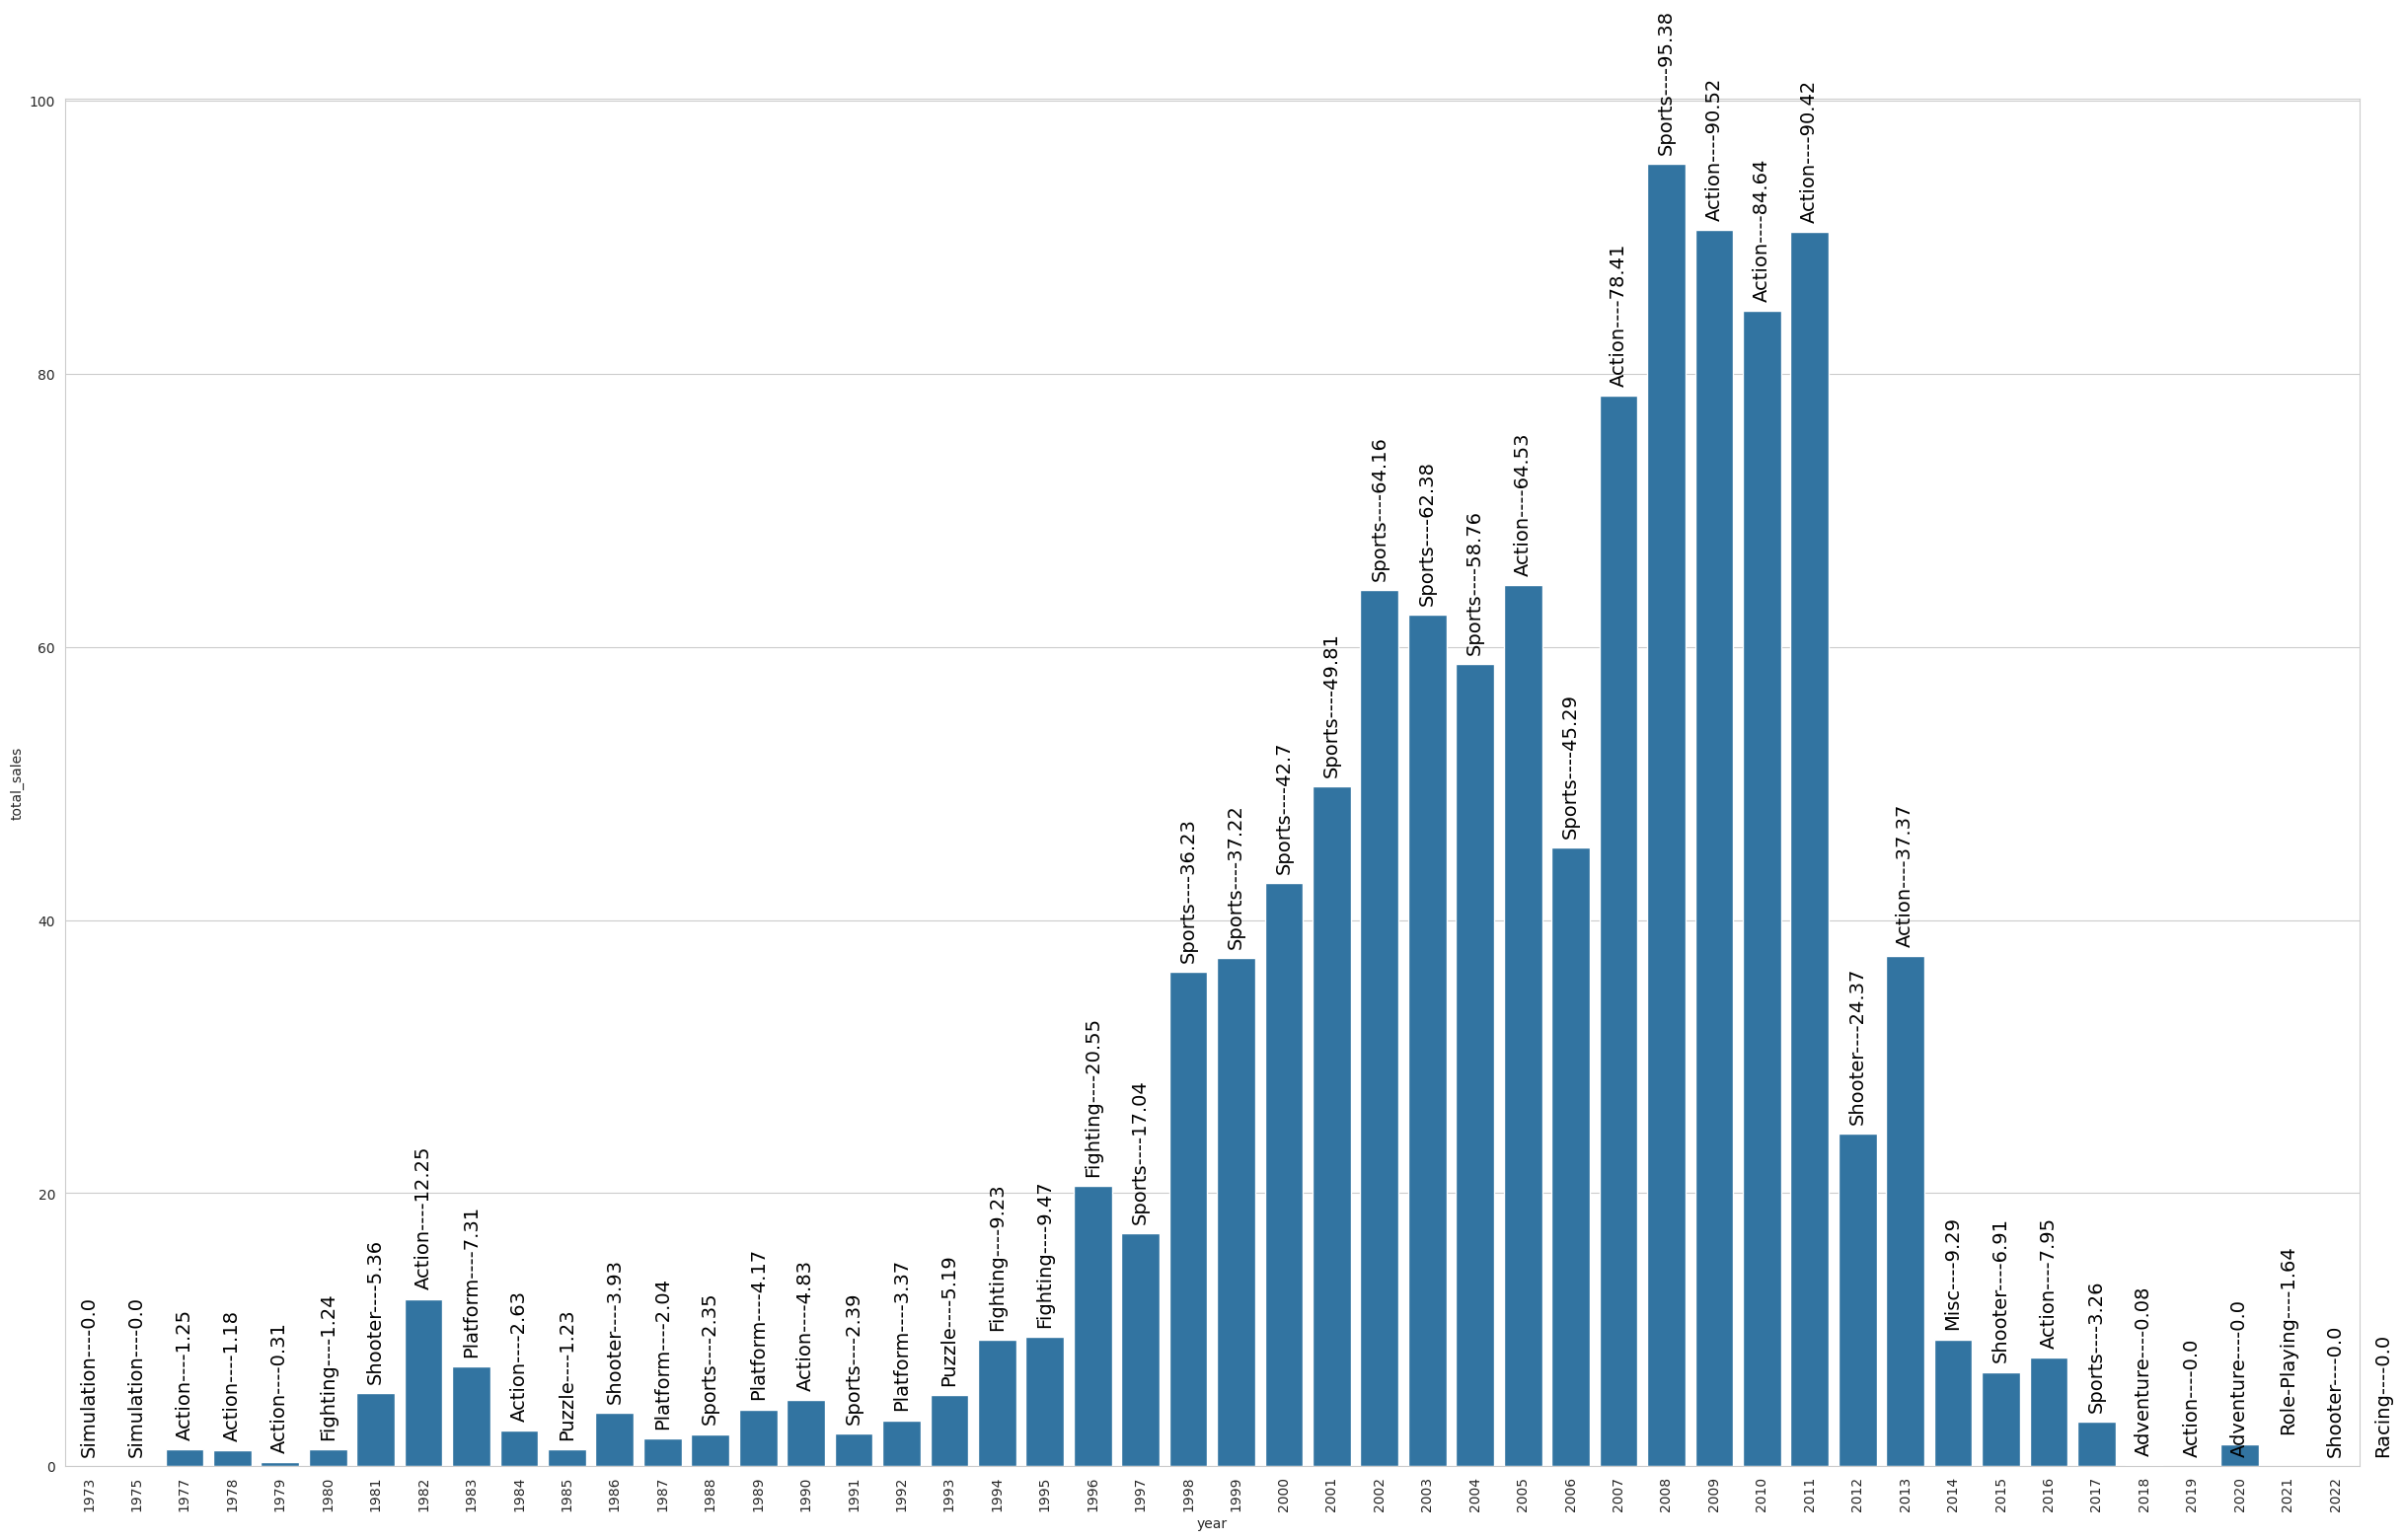

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='year', y='total_sales', data=year_sale_max)
index = 0
for value in year_sale_max['total_sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

#Explorando para descobrir qual gênero de jogo tem o maior quantidade de venda globalmente (total_sales)

Agrupa o DataFrame vd_sale pela coluna genre em seguida, ordena o DataFrame data_genre em ordem decrescente com base na coluna total_sales e plota o gráfico entre total de vendas por gênero

In [ ]:
data_genre = vd_sale.groupby(by=['genre'])['total_sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['total_sales'], ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Fighting'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Adventure'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

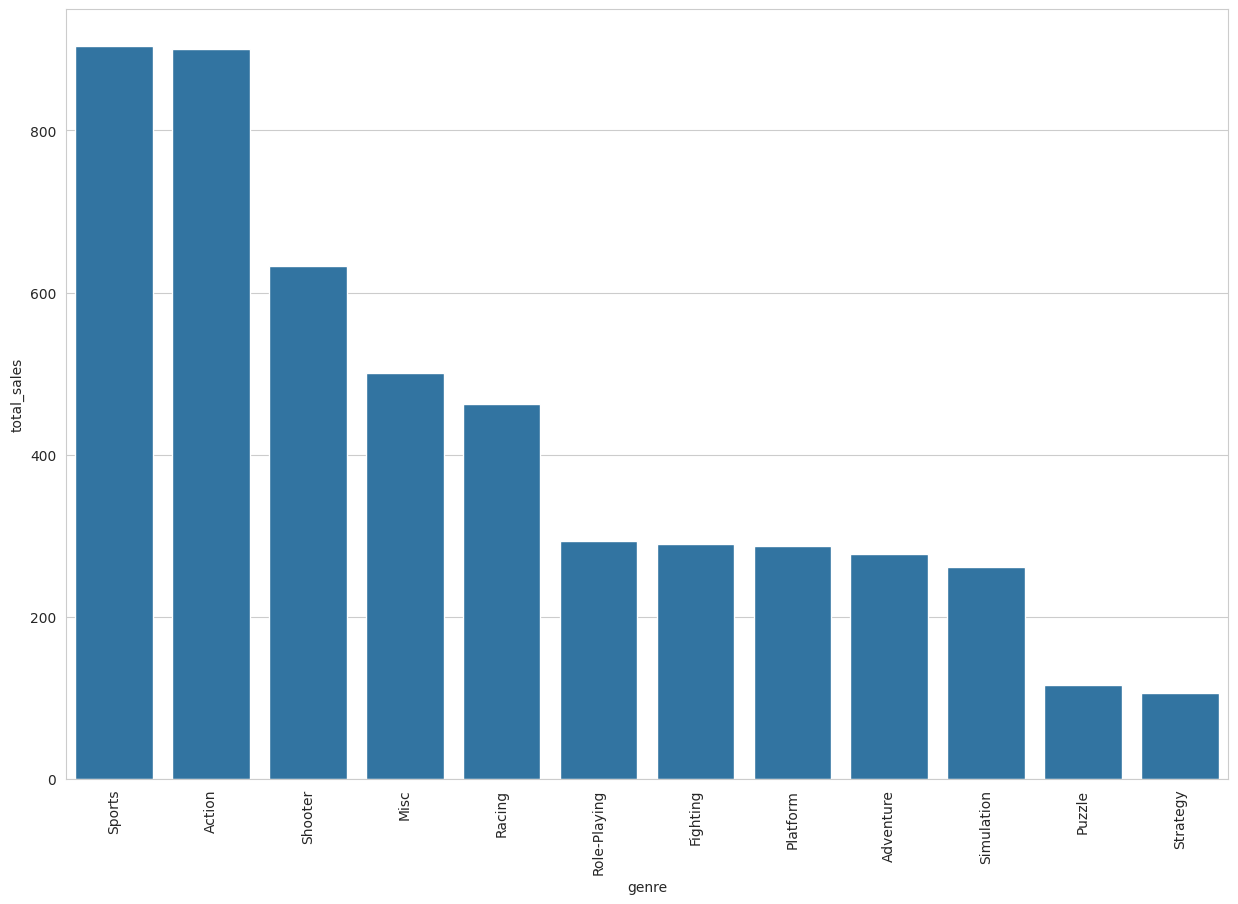

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="genre", y="total_sales", data=data_genre)
plt.xticks(rotation=90)

#Qual plataforma (console) tem a maior quantidade de vendas vendido globalmente

 Agrupa os dados do DataFrame vd_sale por console e calcula a soma das vendas totais (total_sales) para cada console no *data_platform = vd_sale.groupby(by=['console'])['total_sales'].sum()*

In [ ]:
data_platform = vd_sale.groupby(by=['console'])['total_sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['total_sales'], ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'PS'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'Wii'),
  Text(6, 0, 'XB'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'GBA'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GC'),
  Text(11, 0, 'N64'),
  Text(12, 0, '2600'),
  Text(13, 0, 'SNES'),
  Text(14, 0, 'NES'),
  Text(15, 0, 'SAT'),
  Text(16, 0, 'PS4'),
  Text(17, 0, '3DS'),
  Text(18, 0, 'GB'),
  Text(19, 0, 'GEN'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'DC'),
  Text(22, 0, 'XOne'),
  Text(23, 0, 'PSN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'WS'),
  Text(26, 0, 

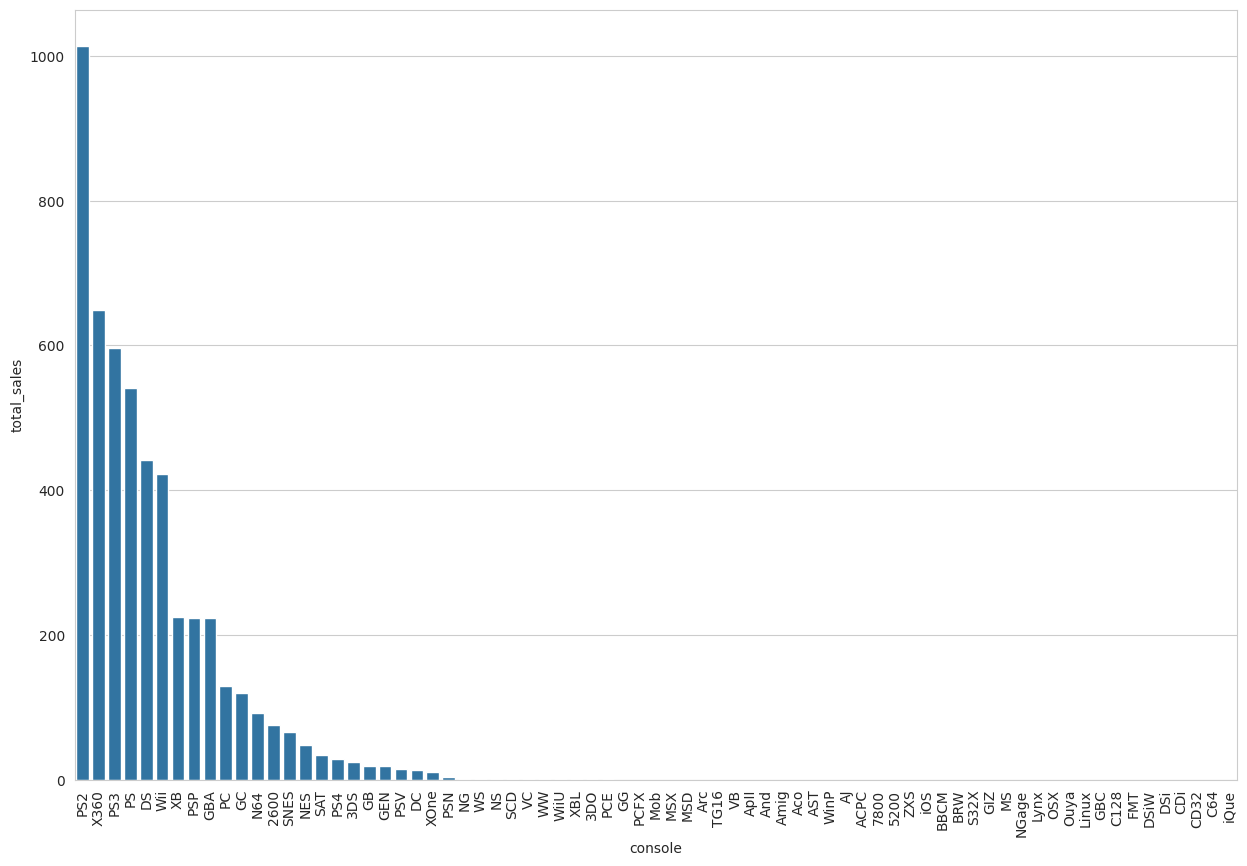

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="console", y="total_sales", data=data_platform)
plt.xticks(rotation=90)

#Mapa de calor para comparação de vendas por gênero em cada região


comp_genre armazena agrupa os dados por genero e calcula a soma das vendas em cada região para cada gênero, resultando em um DataFrame comp_map com as vendas totais por gênero. Depois cria um mapa de calor (heatmap) das vendas totais por gênero

In [ ]:
comp_genre = vd_sale[['genre', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales']]
comp_map = comp_genre.groupby(by=['genre']).sum()


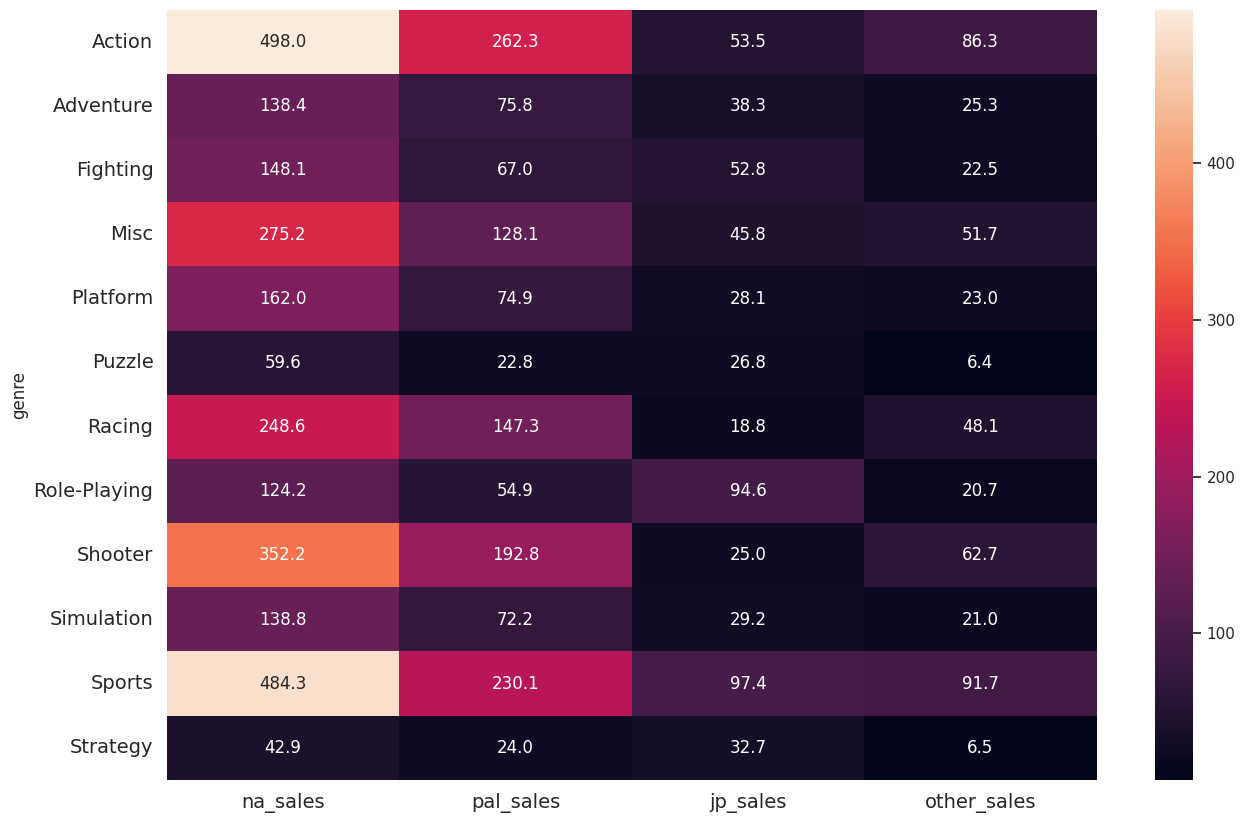

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Converte o DataFrame comp_map para um formato onde genre se torna uma coluna normal e o índice é reiniciado. Transforma o DataFrame em uma coluna sale_area com os valores de vendas em sale_price

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['genre'], value_vars=['na_sales', 'pal_sales', 'jp_sales', 'other_sales'], var_name='sale_area', value_name='sale_price')
comp_table.head()

,genre,sale_area,sale_price
0,Action,na_sales,497.98
1,Adventure,na_sales,138.45
2,Fighting,na_sales,148.05
3,Misc,na_sales,275.21
4,Platform,na_sales,162.04


<Axes: xlabel='genre', ylabel='sale_price'>

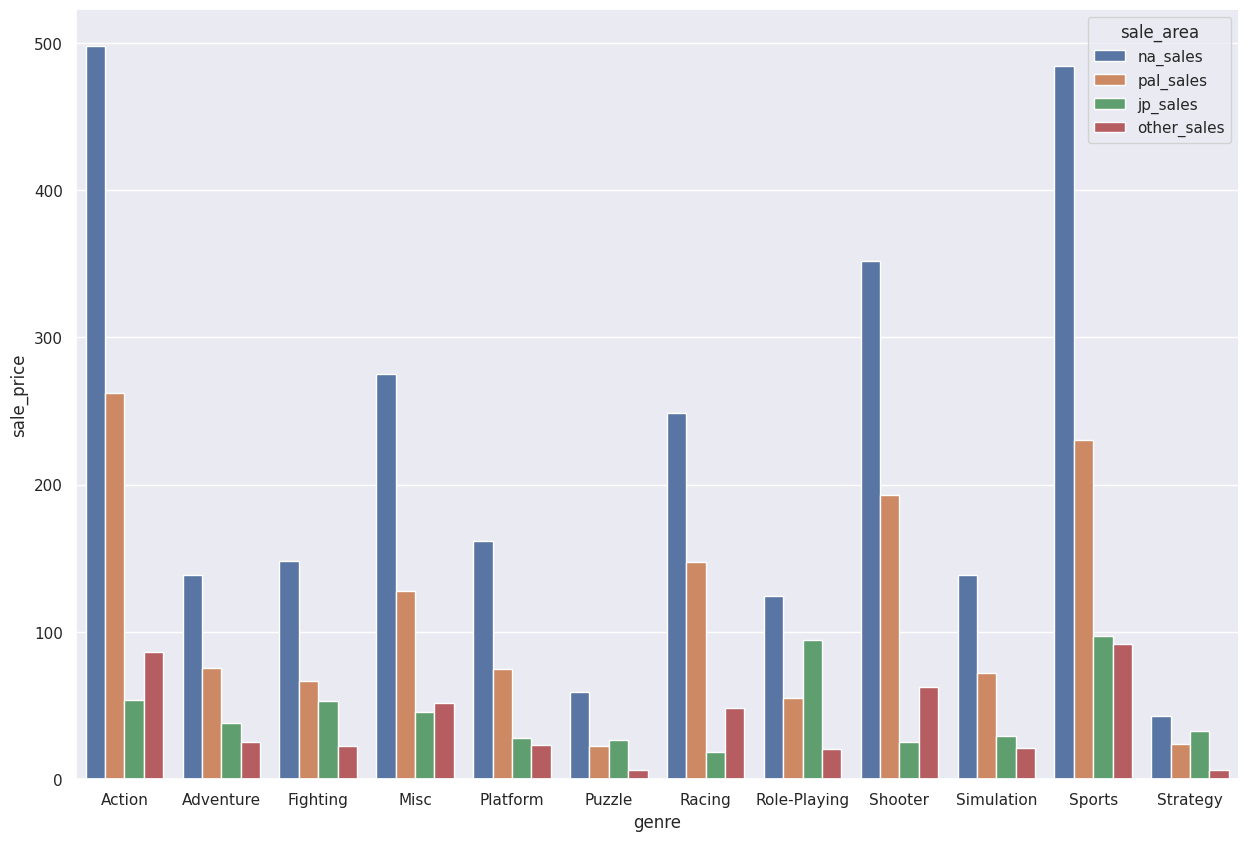

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='genre', y='sale_price', hue='sale_area', data=comp_table)

# Comparação de venda de jogos por plataforma (console)

Seleciona as colunas console, na_sales, pal_sales, jp_sales, e other_sales do DataFrame vd_sale e armazena em comp_platform. *comp_platform.head():* Exibe as 5 primeiras linhas do DataFrame comp_platform para visualização inicial.

In [ ]:
comp_platform = vd_sale[['console', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales']]
comp_platform.head()

,console,na_sales,pal_sales,jp_sales,other_sales
0,PS3,6.37,9.85,0.99,3.12
2,PS2,8.41,5.49,0.47,1.78
3,X360,9.06,5.33,0.06,1.42
5,X360,9.07,4.29,0.13,1.33
6,X360,9.76,3.73,0.11,1.14


Agrupa os dados por console, soma as vendas para cada console e reinicia o índice para obter um DataFrame com o total de vendas por console.

In [ ]:
comp_platform = comp_platform.groupby(by=['console']).sum().reset_index()

In [ ]:
comp_table = pd.melt(comp_platform, id_vars=['console'], value_vars=['na_sales', 'pal_sales', 'jp_sales', 'other_sales'], var_name='sale_area', value_name='sale_price')
comp_table.head()

,console,sale_area,sale_price
0,2600,na_sales,70.62
1,3DO,na_sales,0.00
2,3DS,na_sales,10.99
3,5200,na_sales,0.00
4,7800,na_sales,0.00


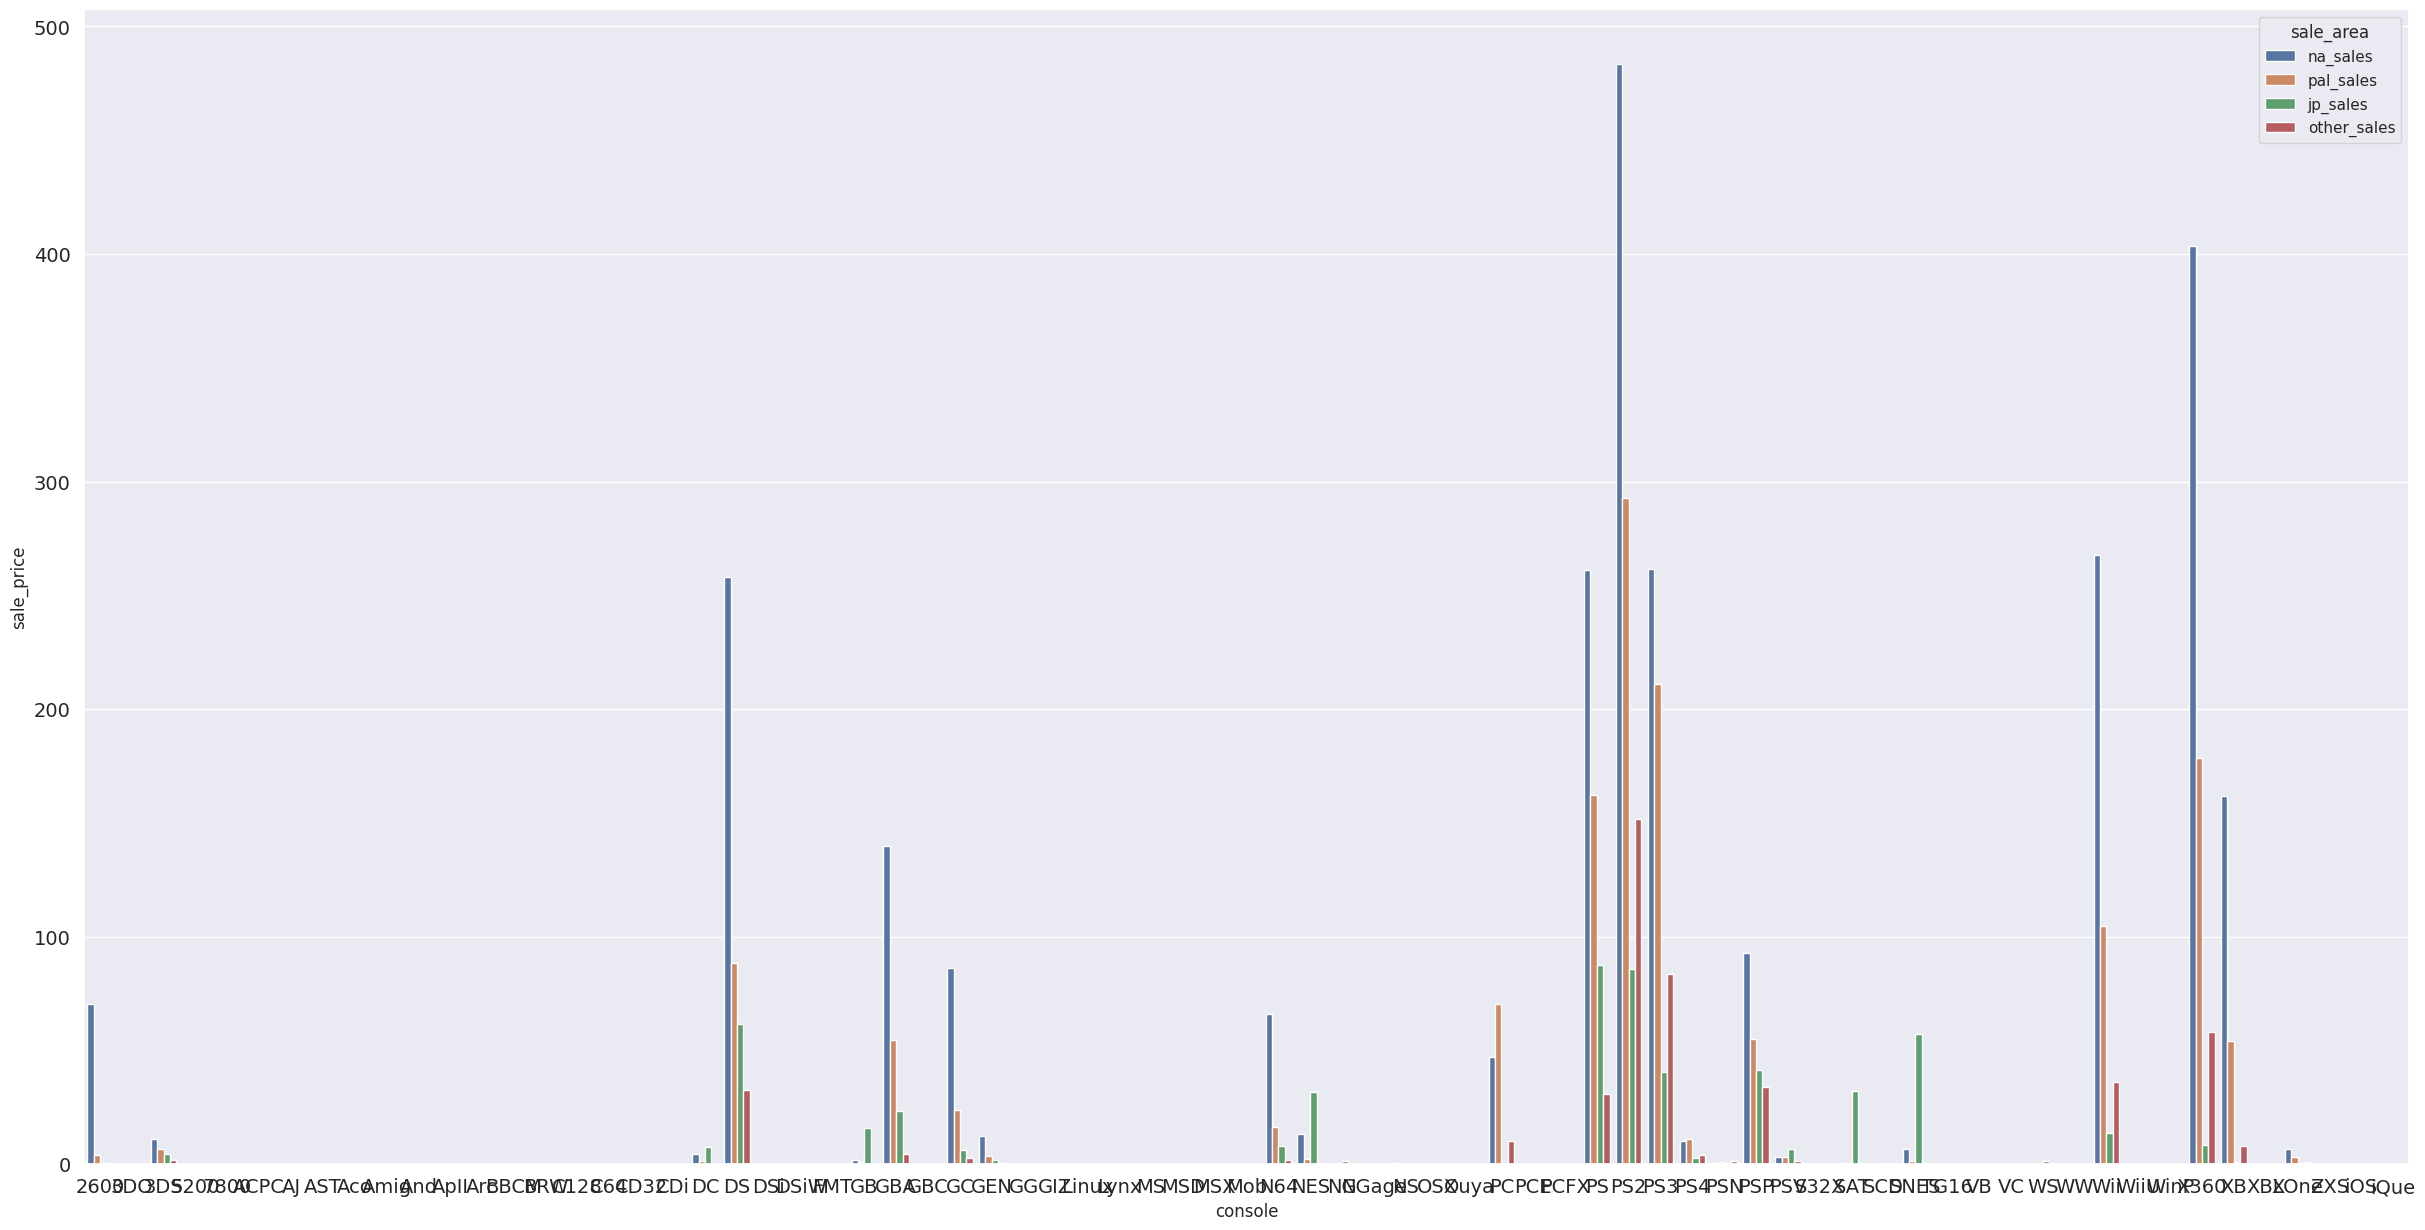

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='console', y='sale_price', hue='sale_area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##Ranqueando as top 20 empresas publicadoras de jogos de video game

 Agrupa os dados do DataFrame vd_sale pela coluna publisher (publicadora), conta o número de lançamentos (year) para cada publicadora, ordena os resultados em ordem decrescente e seleciona as 20 principais publicadoras com o maior número de jogos

In [ ]:
top_publisher = vd_sale.groupby(by=['publisher'])['year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Sega'),
  Text(2, 0, 'Konami'),
  Text(3, 0, 'Electronic Arts'),
  Text(4, 0, 'Activision'),
  Text(5, 0, 'Ubisoft'),
  Text(6, 0, 'Microsoft'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Nintendo'),
  Text(9, 0, 'THQ'),
  Text(10, 0, 'Atari'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'EA Sports'),
  Text(13, 0, 'Bandai'),
  Text(14, 0, 'Namco Bandai'),
  Text(15, 0, 'Acclaim Entertainment'),
  Text(16, 0, 'Hudson Soft'),
  Text(17, 0, 'Namco'),
  Text(18, 0, 'D3 Publisher'),
  Text(19, 0, 'KOEI')])

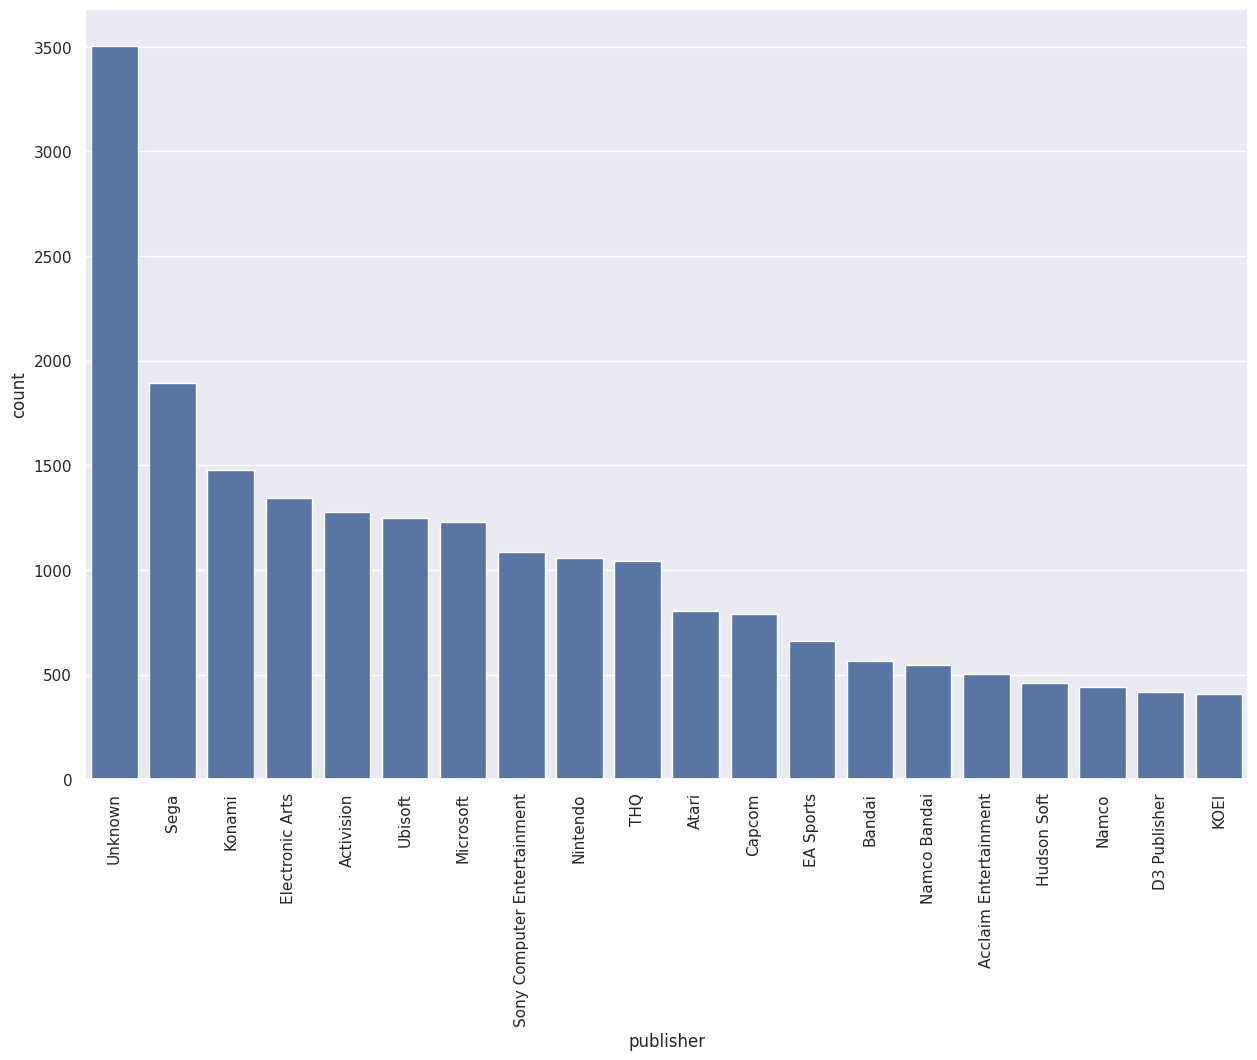

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = "publisher", data = vd_sale, order = vd_sale.groupby(by=['publisher'])['year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation = 90)

#Receita arrecada por região com as vendas dos jogos de video game


Seleciona as colunas de vendas para diferentes regiões (na_sales, pal_sales, jp_sales, other_sales) do DataFrame vd_sale e armazena em top_sale_reg, para então calcula a soma das vendas para cada região, converte o resultado em um DataFrame novo

In [ ]:
top_sale_reg = vd_sale[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,na_sales,2672.16
1,pal_sales,1352.37
2,jp_sales,543.03
3,other_sales,466.03


<Axes: xlabel='region', ylabel='sale'>

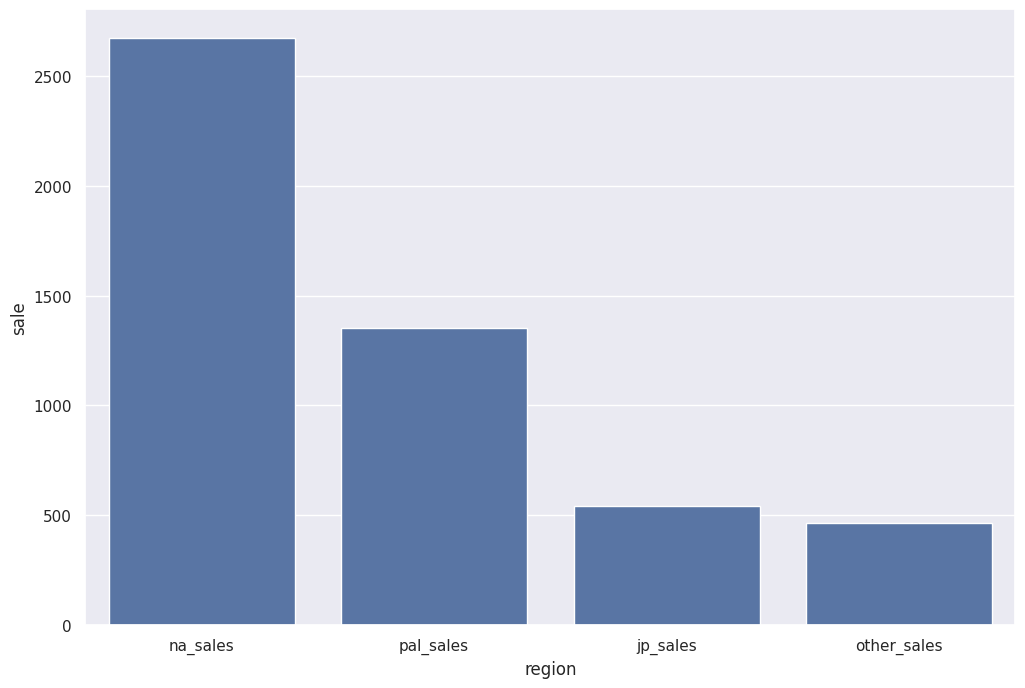

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

#Gáfico de pizza da venda da região




In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7b8c4cabbf70>,
 [Text(-1.0948325829905747, -0.10649701978077282, 'na_sales'),
  Text(0.9475199499027315, -0.5587539212715428, 'pal_sales'),
  Text(0.8755887710046052, 0.6658410501693668, 'jp_sales'),
  Text(0.31545456361734814, 1.053797142856721, 'other_sales')],
 [Text(-0.5971814089039498, -0.05808928351678517, '53.1%'),
  Text(0.516829063583308, -0.30477486614811417, '26.9%'),
  Text(0.47759387509342094, 0.36318602736510913, '10.8%'),
  Text(0.1720661256094626, 0.5747984415582114, '9.3%')])

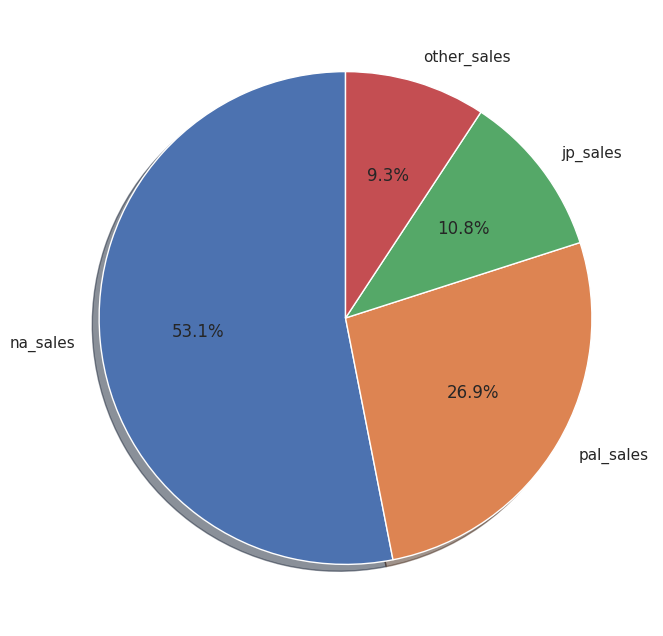

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

#Correlacionando as colunas

Mapa de calor entre as colunas: ano, regiões e avaliação critíca (nota).

 vd_sale.select_dtypes(include=['number']): Cria um DataFrame contendo apenas colunas numéricas para criar uma matriz de correlação do tipo mapa de calor (heatmap) mostrando as correlações entre as colunas numéricas.

  release_date  year
0   2013-09-17  2013
2   2002-10-28  2002
3   2013-09-17  2013
5   2011-11-08  2011
6   2010-11-09  2010


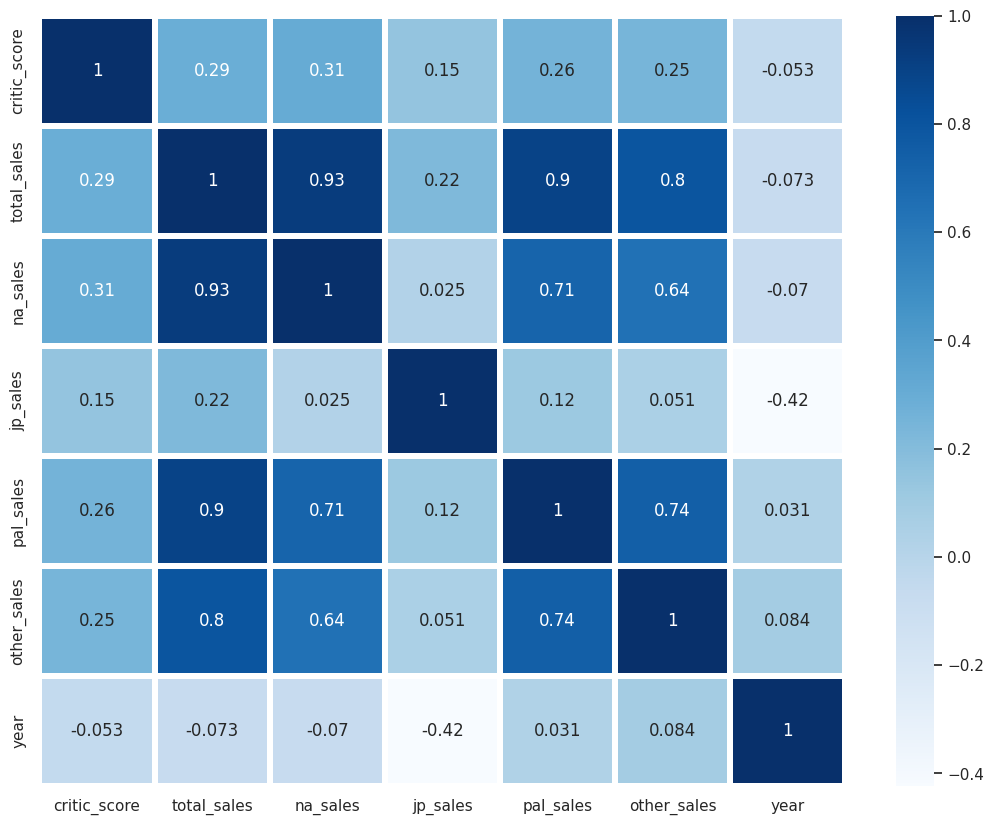

In [ ]:
print(vd_sale[['release_date', 'year']].head())


numeric_columns = vd_sale.select_dtypes(include=['number'])


plt.figure(figsize=(13, 10))
sns.heatmap(numeric_columns.corr(), cmap="Blues", annot=True, linewidth=3)
plt.show()

#Mapa de Pares entre: ano, genero e regiões consumidoras de video games

Cria um novo DataFrame data_pair contendo apenas as colunas year, console, genre, na_sales, pal_sales, e other_sales do DataFrame original vd_sale. para depois fazer um gráfico de pares entre os dados e os anos em que  foram lançados

In [ ]:
data_pair = vd_sale.loc[:,["year","console", "genre", "na_sales","pal_sales", "other_sales"]]
data_pair

,year,console,genre,na_sales,pal_sales,other_sales
0,2013,PS3,Action,6.37,9.85,3.12
2,2002,PS2,Action,8.41,5.49,1.78
3,2013,X360,Action,9.06,5.33,1.42
5,2011,X360,Shooter,9.07,4.29,1.33
6,2010,X360,Shooter,9.76,3.73,1.14
...,...,...,...,...,...,...
63284,2006,PC,Strategy,NaN,NaN,NaN
63285,2002,PC,Strategy,NaN,NaN,NaN
63286,2002,PC,Strategy,NaN,NaN,NaN
63287,2000,PC,Strategy,NaN,NaN,NaN


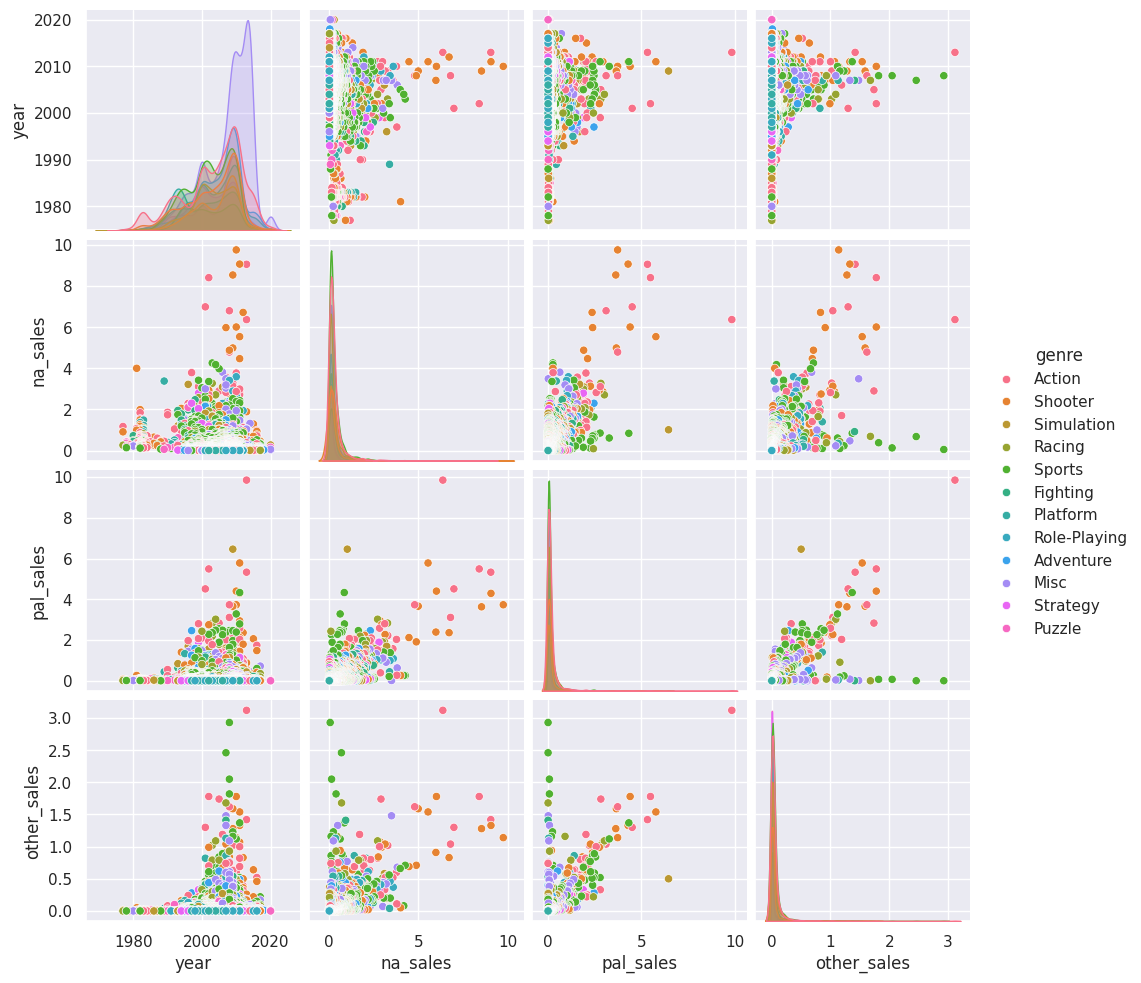

In [ ]:
sns.pairplot(data_pair, hue='genre')

#Gráfico de pares para identificar o log work (registro de vendas) por região pelo ano e gênero

Cria uma cópia do DataFrame data_pair para preservá-lo enquanto as transformações que serão feitas em data_pair_log

In [ ]:
data_pair_log = data_pair.copy()

In [ ]:
sale_columns = ['na_sales', 'pal_sales', 'other_sales']

O código remove as linhas em data_pair_log onde as colunas na_sales, pal_sales, ou other_sales são iguais a 0, para evita erros ao aplicar a transformação logarítmica

In [ ]:
data_pair_log = data_pair_log[data_pair_log.na_sales != 0]
data_pair_log = data_pair_log[data_pair_log.pal_sales != 0]
data_pair_log = data_pair_log[data_pair_log.other_sales != 0]

In [ ]:
data_pair_log

,year,console,genre,na_sales,pal_sales,other_sales
0,2013,PS3,Action,6.37,9.85,3.12
2,2002,PS2,Action,8.41,5.49,1.78
3,2013,X360,Action,9.06,5.33,1.42
5,2011,X360,Shooter,9.07,4.29,1.33
6,2010,X360,Shooter,9.76,3.73,1.14
...,...,...,...,...,...,...
63284,2006,PC,Strategy,NaN,NaN,NaN
63285,2002,PC,Strategy,NaN,NaN,NaN
63286,2002,PC,Strategy,NaN,NaN,NaN
63287,2000,PC,Strategy,NaN,NaN,NaN


0 código aplica a transformação logarítmica natural usando np.log(). Isso é útil para reduzir a escala (normalização) de valores e lidar com dados altamente dispersos devido a grande base de dados

In [ ]:
data_pair_log['na_sales'] = np.log(data_pair_log['na_sales']);
data_pair_log['pal_sales'] = np.log(data_pair_log['pal_sales']);
data_pair_log['other_sales'] = np.log(data_pair_log['other_sales']);

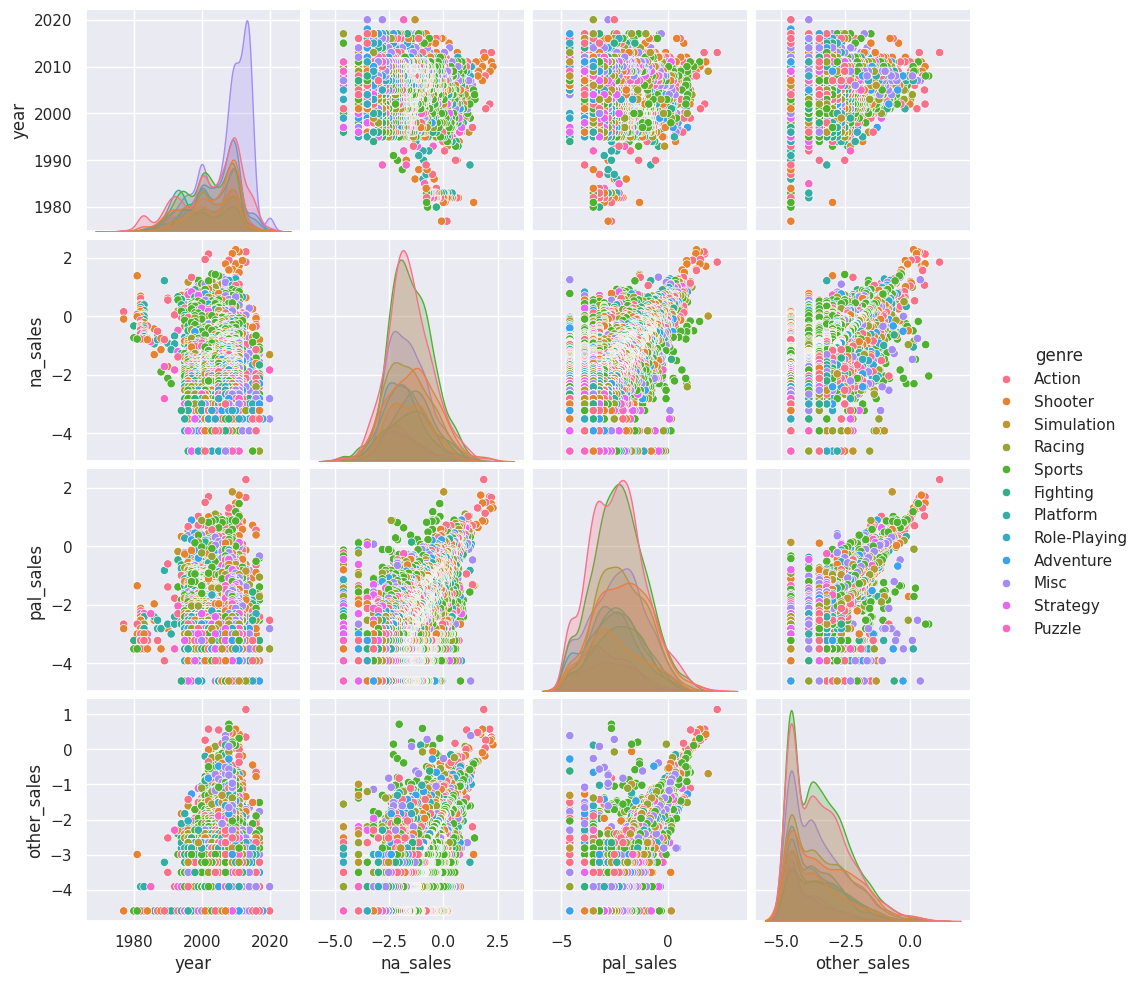

In [ ]:
sns.pairplot(data_pair_log, hue='genre',  palette="husl")

#Matriz de confusão entre o gênero e plataforma (console), para comparar os 10 consoles e gêneros mais comuns

O código seleciona os 10 consoles e 10 gêneros mais comuns em vd_sale usando value_counts() e filtrar os dados para manter apenas esses consoles e gêneros devido ao grande número de dados.

A tabela de contingência (conf_matrix_data) é criada, mostrando a frequência de cada combinação de console e gênero nos dados filtrados.

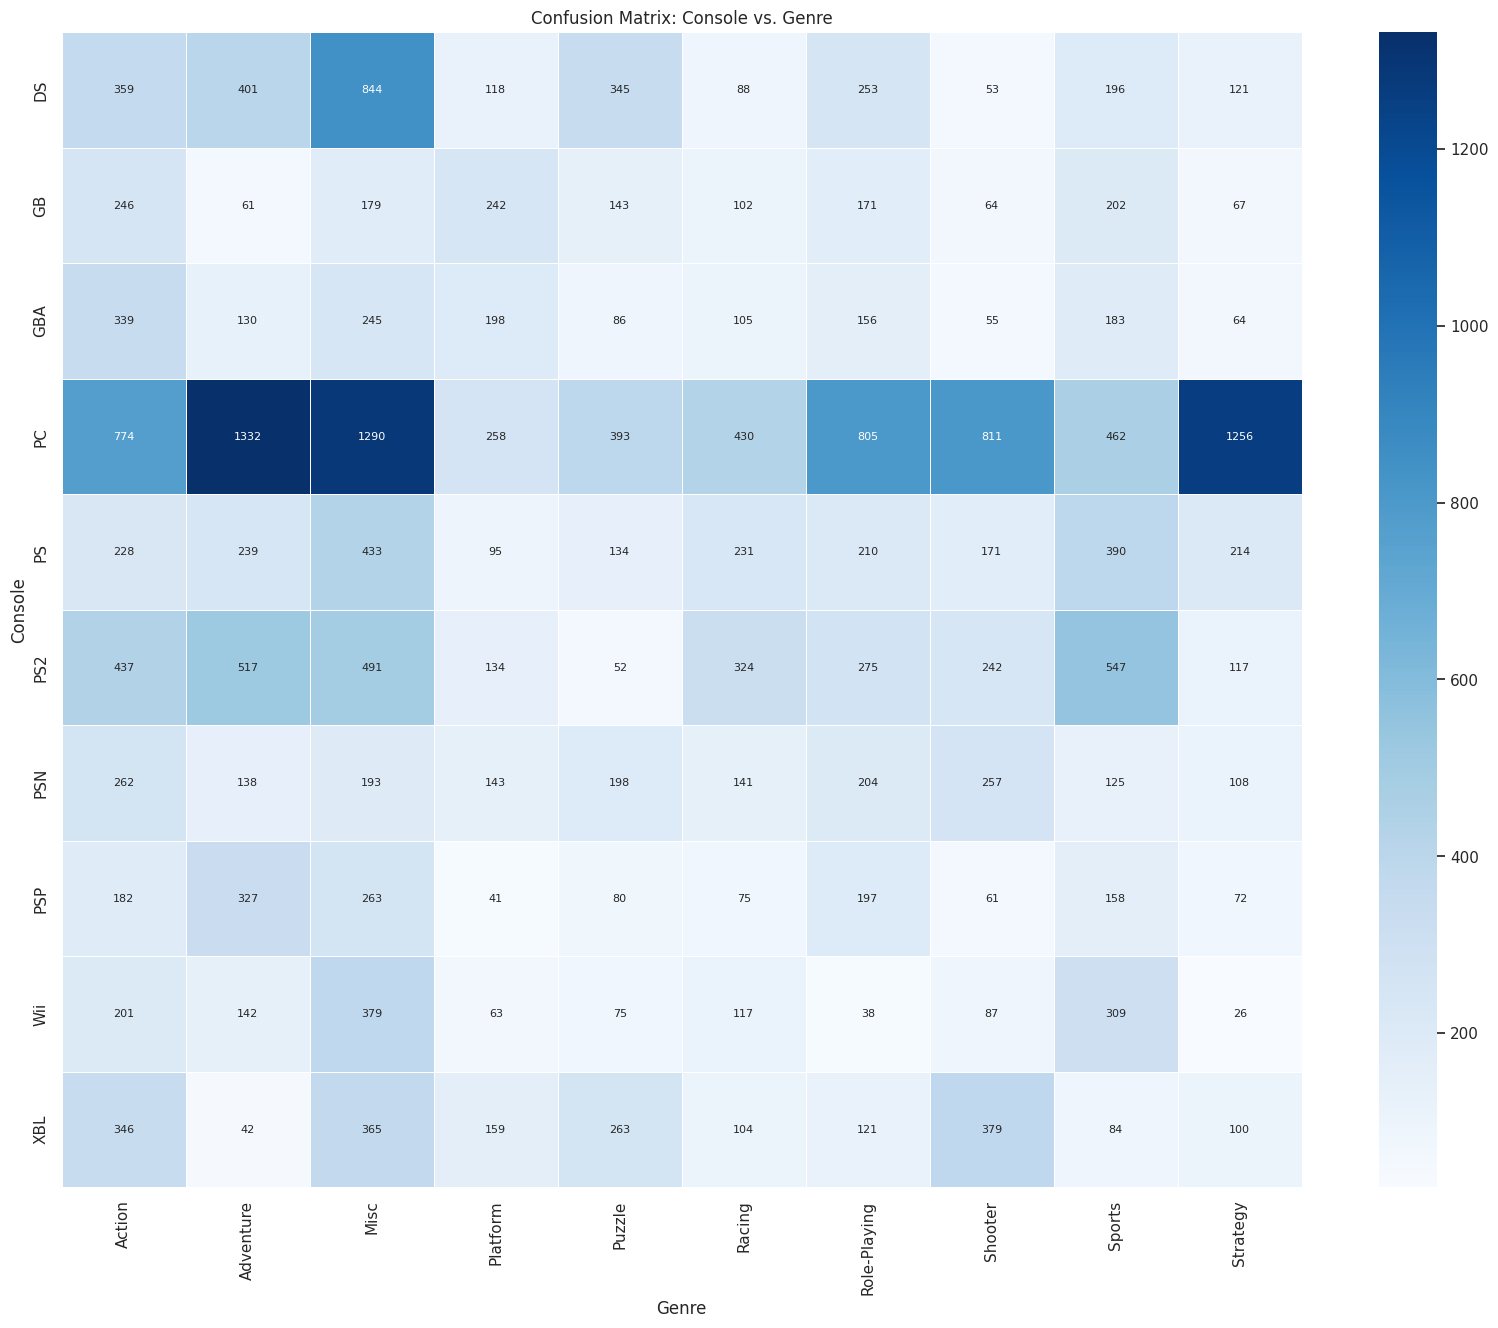

In [ ]:
# Os 10 consoles e gêneros mais comuns
top_consoles = vd_sale['console'].value_counts().index[:10]
top_genres = vd_sale['genre'].value_counts().index[:10]

filtered_data = vd_sale[vd_sale['console'].isin(top_consoles) & vd_sale['genre'].isin(top_genres)]

# Criar a tabela de contingência com os dados filtrados
conf_matrix_data = pd.crosstab(filtered_data['console'], filtered_data['genre'])

# Plotar a matriz de confusão ajustada
plt.figure(figsize=(20, 15))  # Aumentar o tamanho da figura
sns.heatmap(conf_matrix_data, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 8})  # Reduzir o tamanho da fonte
plt.title("Confusion Matrix: Console vs. Genre")
plt.ylabel('Console')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

# Apos a relização das etapas de pre-processamento dos dados e análise dos mesmos para encontrar novos dados de valor para a pesquisa, então aplicando algoritmos de machine learnig para classficação dos dados com os objetivos preditivos

 Dentre os modelos de aprendizagem de máquina que ultizaremos os que foram apresentado em aula

* KNN
* SVM
* Desion Tree Classifer
* Accuracy Score






Importação das bibliotecas de aprendizagem de máquina e treinamento de dados


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

Abaixo será feito as seguintes etapas:

1.   Remoção de colunas irrelevantes
2.   Preenchimento de campos vazios (Nan) com valores médios da coluna
3. Transformar em variáveis categóricas, valor não numéricos
4. Loop para percorrer todas as colunas para codicação das categorias ad hoc
5. Checagem se foi feito toda transformação em valores int64, dos valores codificados


Codificar variáveis categoricas: algoritmos de machine learning geralmente trabalham melhor com dados numéricos, precisamos transformar essas categorias em números.


In [ ]:

# Remover colunas irrelevantes
vd_sale = vd_sale.drop(['img', 'last_update'], axis=1)

In [ ]:
# Preencher valores ausentes com a média (para colunas numéricas)
numeric_columns = vd_sale.select_dtypes(include=['number']).columns
vd_sale[numeric_columns] = vd_sale[numeric_columns].fillna(vd_sale[numeric_columns].mean())

In [ ]:

# Codificar variáveis categóricas
label_encoders = {}
categorical_columns = ['console', 'publisher', 'developer', 'genre']

In [ ]:
for column in categorical_columns:
    le = LabelEncoder()
    vd_sale[column] = le.fit_transform(vd_sale[column].astype(str))
    label_encoders[column] = le

In [ ]:
# Verificar se todas as colunas são numéricas
print(vd_sale.dtypes)

title                   object
console                  int64
genre                    int64
publisher                int64
developer                int64
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
year                     int64
dtype: object


X: Contém as variáveis independentes (features) que serão usadas para treinar o modelo.


y:  contém a variável dependente (target), que é o rótulo ou valor que o modelo deve prever.

In [ ]:
# Selecionar as features e a target
X = vd_sale.drop(['title', 'genre', 'release_date'], axis=1)  # 'genre' é o alvo
y = vd_sale['genre']

Nos dois blocos abaixo iremos fazer o pré-processamento dos dados para melhorar a qualidade do modelo de machine learning



*   Balanceamento das classes: com SMOTE cria um conjunto de dados mais equilibrado, onde todas as classes têm uma representação similar.
*   Seleção de características: identifica e mantém as características mais relevantes, o que potencialmente melhora a performance e a interpretabilidade do modelo.









In [ ]:
# Step 1: Balanceamento das classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# Selecionar as características mais importantes
selector = SelectKBest(f_classif, k='all')
X_new = selector.fit_transform(X_balanced, y_balanced)



*   Padronizar dados: Padronização (ou normalização) é o processo de ajustar as features (variáveis independentes) para que todas tenham uma média de 0 e um desvio padrão de 1.
*   Dividir os dados de treinamento e teste:Dividir os dados em conjuntos de treino e teste é uma prática comum em machine learning para avaliar o desempenho do modelo.



In [ ]:
# Padronizar os dados para KNN e SVM
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [ ]:
# Step 2: Dividir os dados (treino e teste)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_balanced, test_size=0.3, random_state=42)


Abaixo iremos aplica três algoritmos de machine learning (Árvore de Decisão, SVM e KNN) nos dados de treino e realiza a predição nos dados de teste.



1.   Decision Tree: Cria um modelo de Árvore de Decisão, que é um algoritmo de classificação baseado em regras de decisão.
2.   SVM: Cria um dicionário que especifica os hiperparâmetros a serem otimizados para o SVM (C e kernel).
2.   KNN: knn_params: Um dicionário que especifica os hiperparâmetros a serem otimizados para o KNN (n_neighbors e weights).

n_neighbors: Define o número de vizinhos a serem considerados na classificação.
  weights: Define a função de ponderação usada para calcular as distâncias (uniform usa todos os vizinhos igualmente, distance pondera os vizinhos pela distância).



In [ ]:
# Step 3: Aplicar os Algoritmos

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [ ]:

# Support Vector Machine (SVM)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear']}
svm_model = SVC(max_iter=2000)  # Limitar o número de iterações
svm_grid = GridSearchCV(svm_model, svm_params, cv=3, n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
svm_predictions = svm_best.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# K-Nearest Neighbors (KNN)
knn_params = {'n_neighbors': range(3, 10), 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
knn_predictions = knn_best.predict(X_test)

Em vez de treinar o modelo em uma única partição de treino e avaliá-lo em uma única partição de teste, a validação cruzada divide o conjunto de dados em múltiplas partições, treinando e testando o modelo em diferentes combinações dessas partições.

In [ ]:
# Step 4: Validação Cruzada
dt_scores = cross_val_score(dt_model, X_new, y_balanced, cv=5)
svm_scores = cross_val_score(svm_best, X_new, y_balanced, cv=5)
knn_scores = cross_val_score(knn_best, X_new, y_balanced, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider

Abaixo iremos comparar os valores de acuracia para equiparar os valores e verificar qual tem as melhores taxas de precisão de acertividade para nosso conjunto de dados, para cada algoritmo de aprendizagem de máquina diferente.

In [ ]:
# Step 5: Avaliação e Comparação
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

Decision Tree Accuracy: 0.5364428724815259
SVM Accuracy: 0.0863702393734605
KNN Accuracy: 0.5060001263184488


Implentação de relatórios preditivos de desempenho e classificação



1.   Precisão: A precisão mede a proporção de previsões corretas entre todas as previsões feitas para uma determinada classe.
2.   Recall: A revocação mede a proporção de verdadeiros positivos identificados corretamente em relação ao total de verdadeiros positivos reais.
2.  f1-score: O F1-Score é a média harmônica entre precisão e revocação. Ele é útil quando você quer um balanço entre os dois.
2.   support:Suporte é o número de ocorrências de cada classe no conjunto de dados de teste.



In [ ]:
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37      2569
           1       0.54      0.55      0.55      2649
           2       0.64      0.66      0.65      2636
           3       0.59      0.59      0.59      2586
           4       0.53      0.53      0.53      2677
           5       0.50      0.48      0.49      2589
           6       0.55      0.52      0.54      2666
           7       0.55      0.53      0.54      2668
           8       0.48      0.47      0.47      2630
           9       0.59      0.62      0.60      2627
          10       0.55      0.51      0.53      2707
          11       0.57      0.57      0.57      2662

    accuracy                           0.54     31666
   macro avg       0.54      0.54      0.54     31666
weighted avg       0.54      0.54      0.54     31666

SVM Classification Report:
               precision    recall  f1-score   support

           

In [ ]:
print("\nCross-Validation Scores (Média de 5-fold):")
print("Decision Tree:", dt_scores.mean())
print("SVM:", svm_scores.mean())
print("KNN:", knn_scores.mean())


Cross-Validation Scores (Média de 5-fold):
Decision Tree: 0.5292378816254908
SVM: 0.08644084488923573
KNN: 0.5083381331416865
